<a href="https://colab.research.google.com/github/erwincarlogonzales/CodingDojo/blob/main/ecommerce_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Source of data

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.4 MB/s 


In [96]:
# import libraries
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import sweetviz as sv

# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display = 'diagram')

# ML model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Deep Learning Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# saving the model
import pickle

In [4]:
# load file
filename = '/content/drive/MyDrive/Colab Notebooks/Proj 2 Churn Dataset.xlsx'
df = pd.read_excel(filename)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.shape

(5630, 20)

2) Brief description of data. This is project is about creating a model that predicts customer churn from an ecommerce dataset

3) What is the target? Customer Churn

4) Is this a classification or regression problem? this is a classification problem

5) How many features? 20

6) How many rows of data. 5630

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

# Explore the dataset

In [6]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# check for missing values
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [9]:
# check for outliers
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [10]:
# drop irrelevant cols
df.drop(columns = 'CustomerID', inplace = True)

In [11]:
# checked max values for impossible values but found none
df[df['DaySinceLastOrder'] > 25]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1490,0,3.0,Phone,1,11.0,COD,Female,2.0,3,Mobile,5,Married,6,0,14.0,0.0,2.0,30.0,132.04
2040,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,2.0,4,Fashion,3,Married,6,0,11.0,5.0,11.0,46.0,206.09
4305,0,4.0,Mobile Phone,1,12.0,COD,Female,3.0,4,Mobile Phone,5,Married,7,0,15.0,1.0,3.0,31.0,157.04


In [12]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [13]:
# id inconsistent categorical values
df['MaritalStatus'].value_counts()

# checked categorical cols no inconsistent values

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [14]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [15]:
# replace Phone with Mobile Phone
df['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'}, inplace = True)

In [16]:
# address missing values
df.fillna(df.median(), inplace = True)

<ipython-input-16-56a659fe934f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace = True)


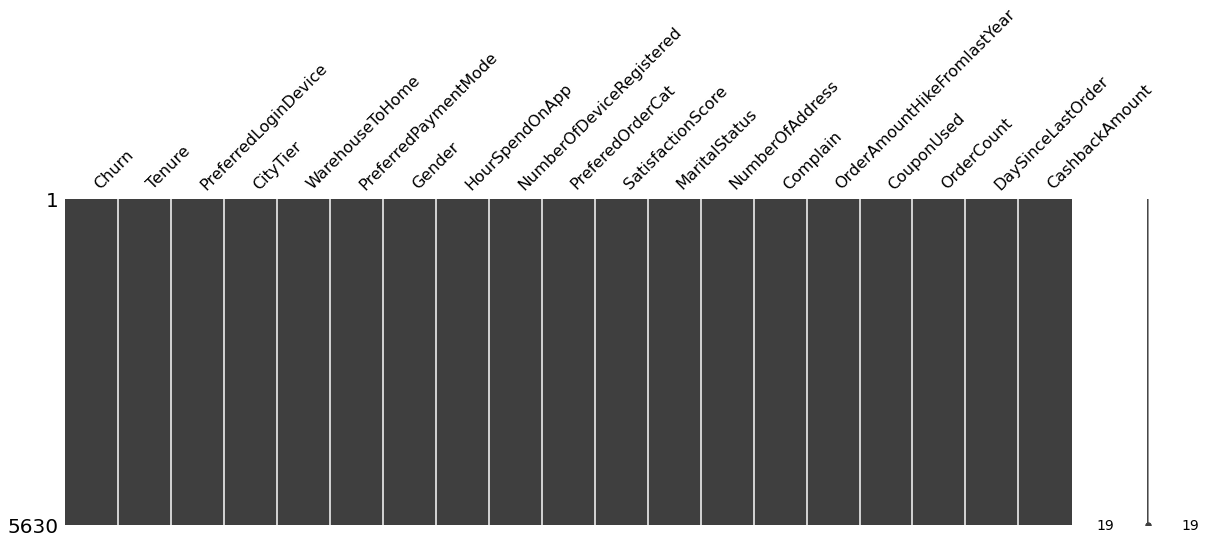

In [17]:
# check for missing values
mno.matrix(df, figsize = (20, 6));

# Visualization

In [18]:
# visualize an overview of the dataset
report = sv.analyze(df, target_feat = 'Churn')
report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



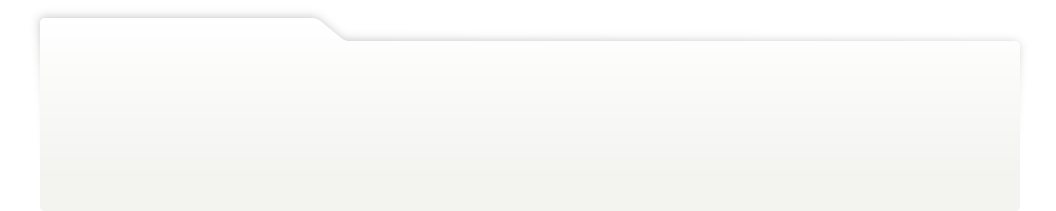
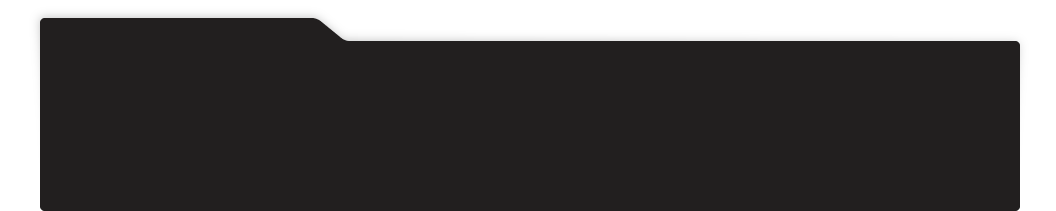
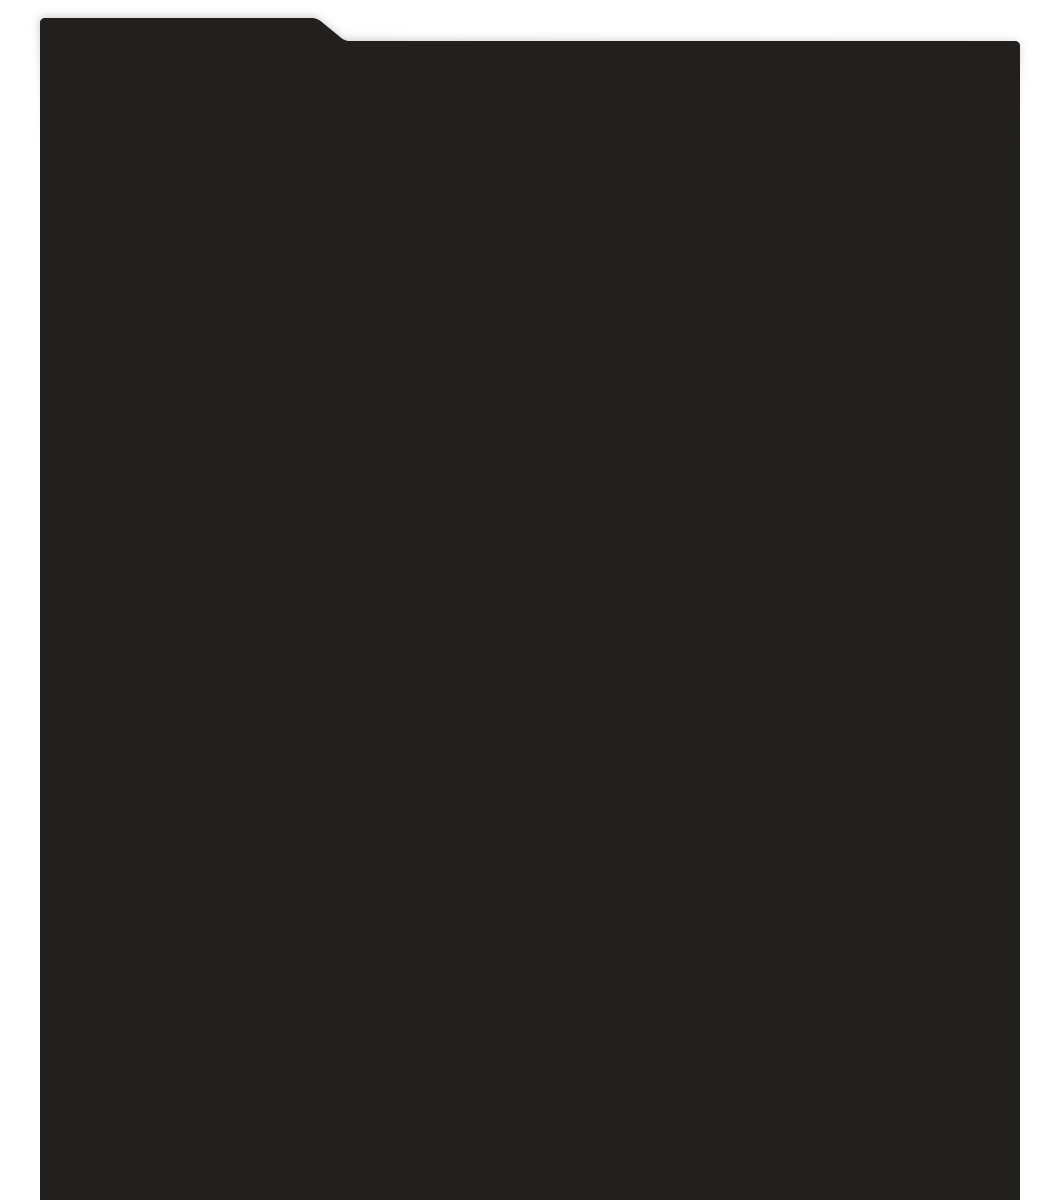
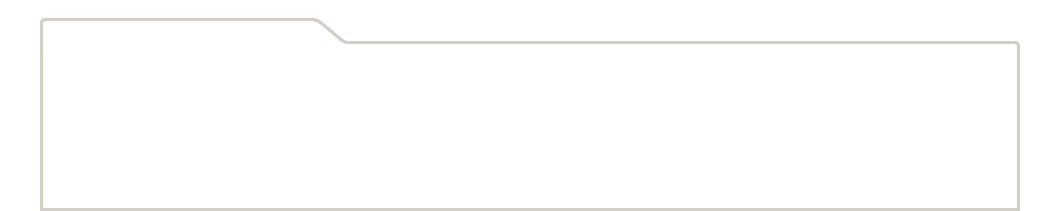
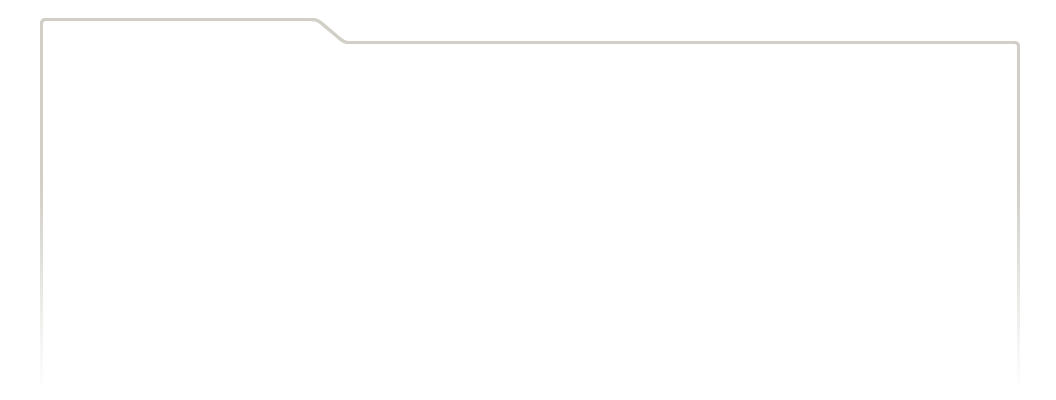
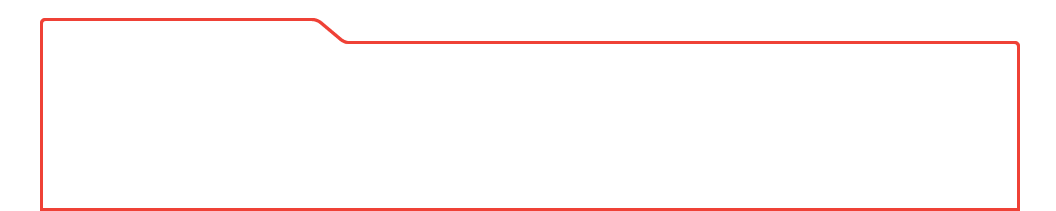
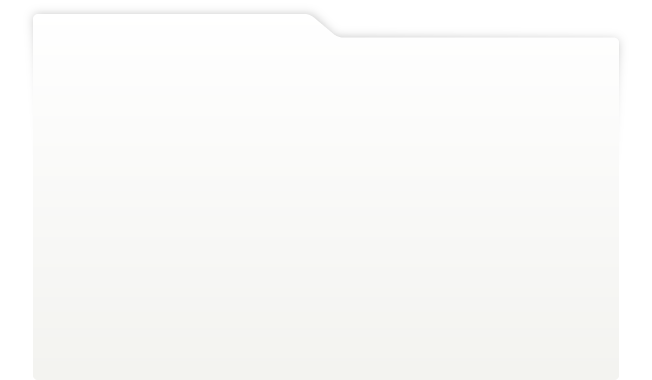
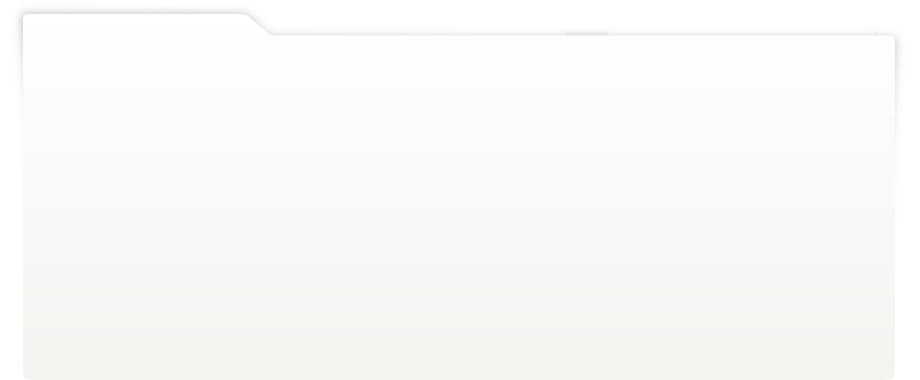
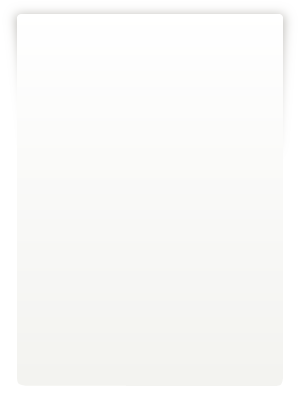
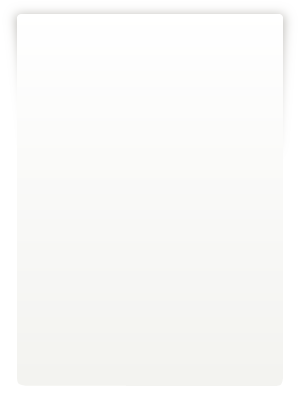
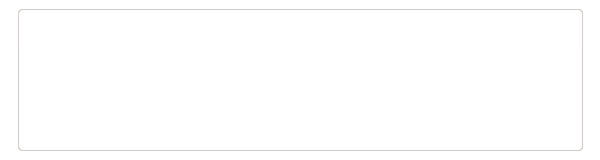
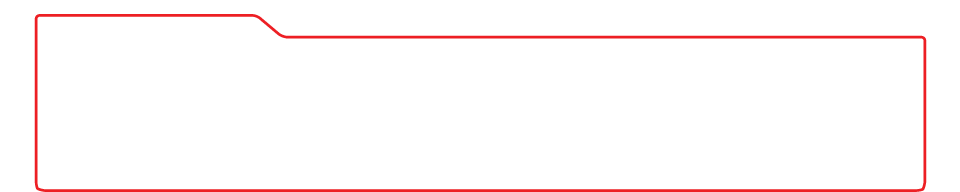
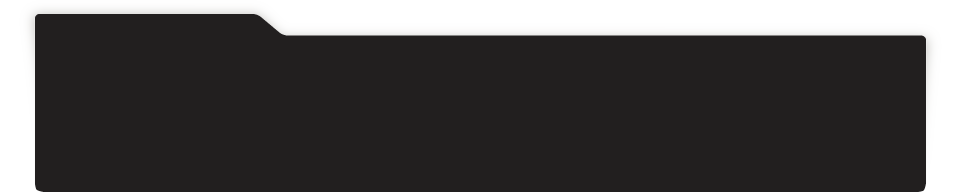
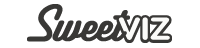
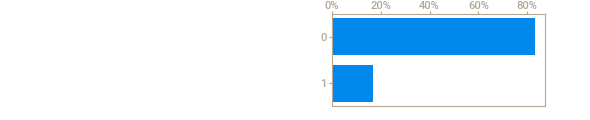
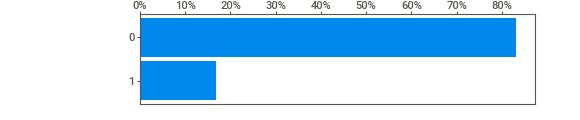
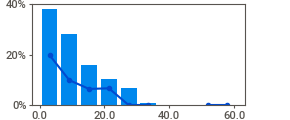
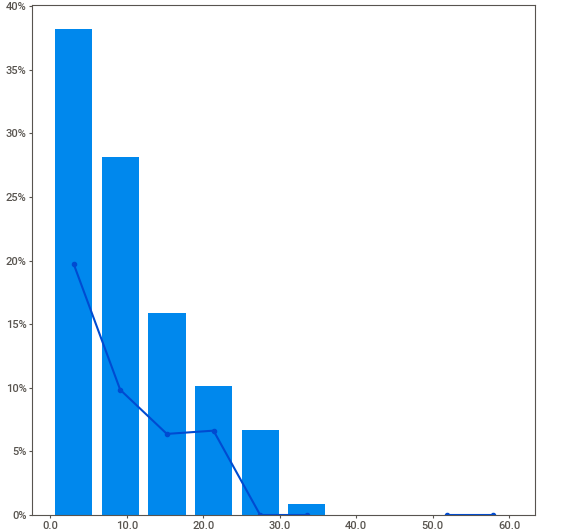
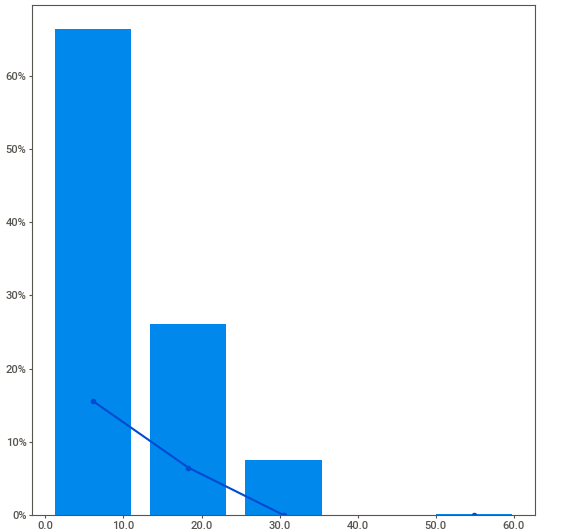
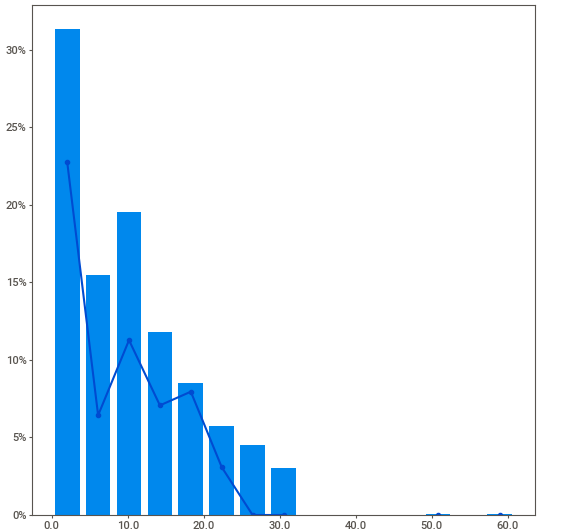
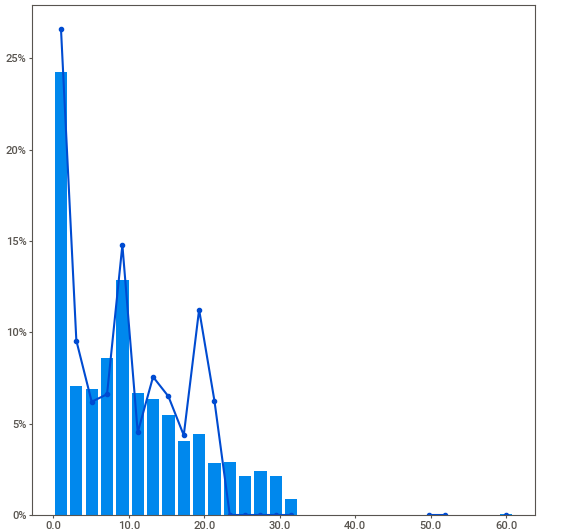
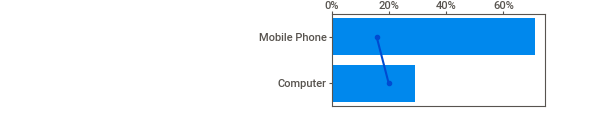
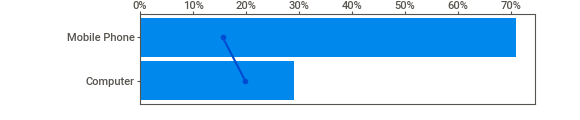
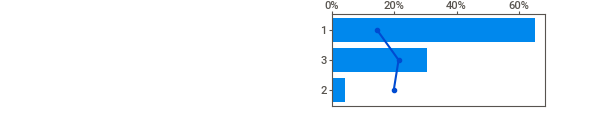
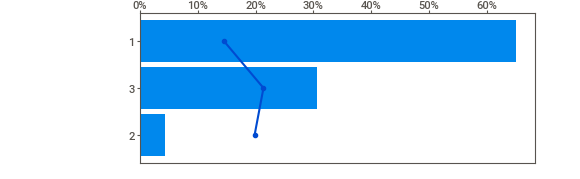
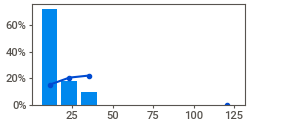
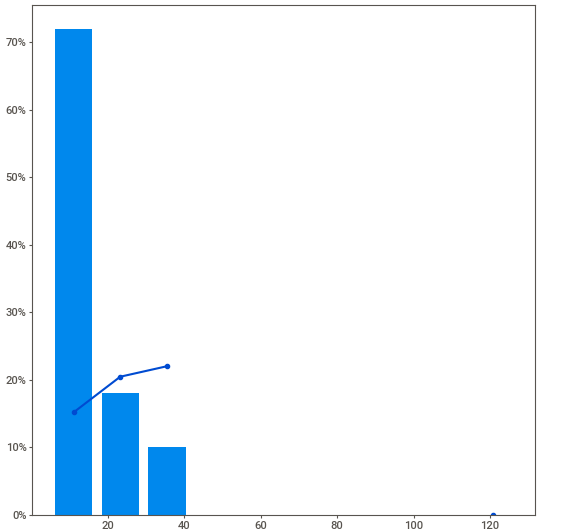
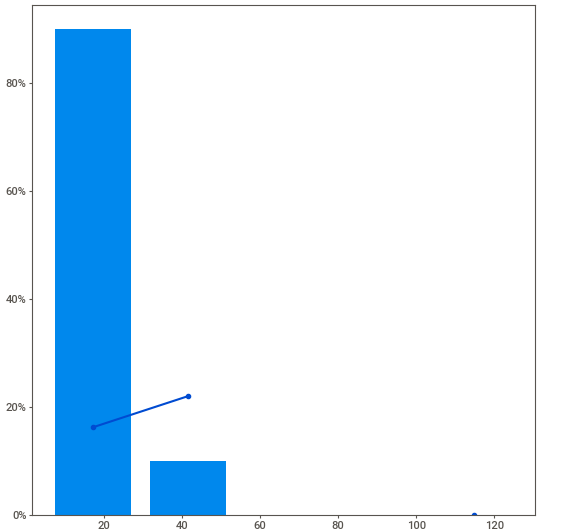
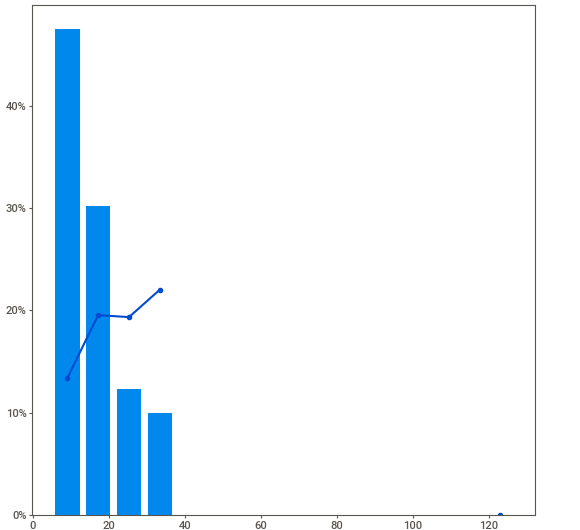
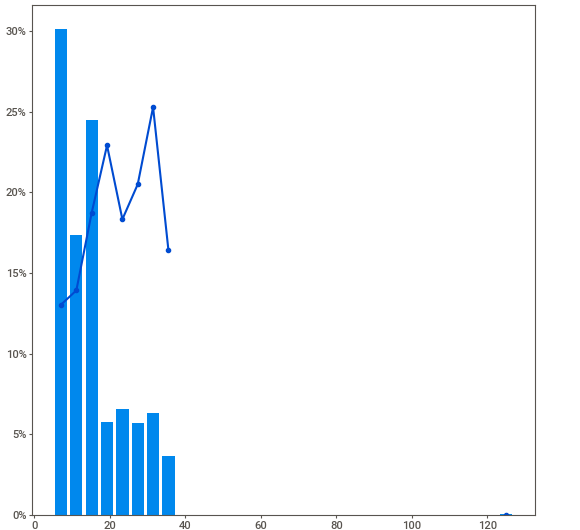
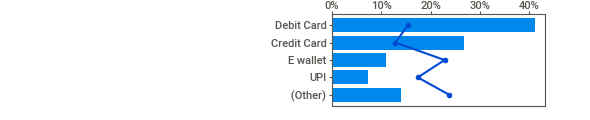
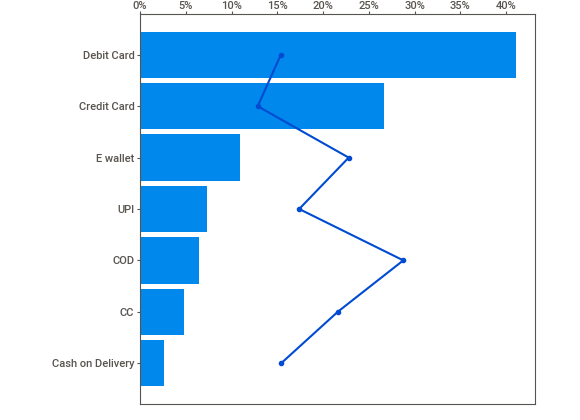
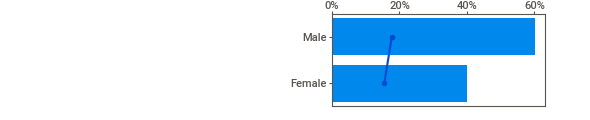
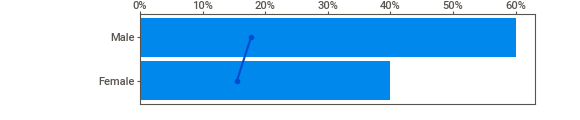
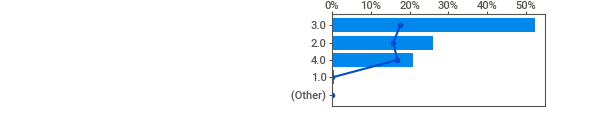
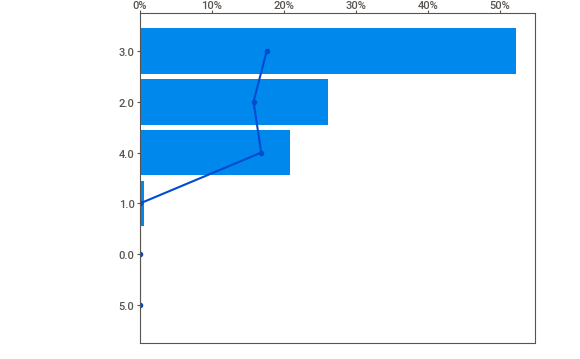
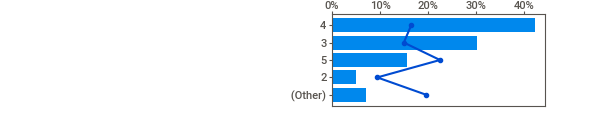
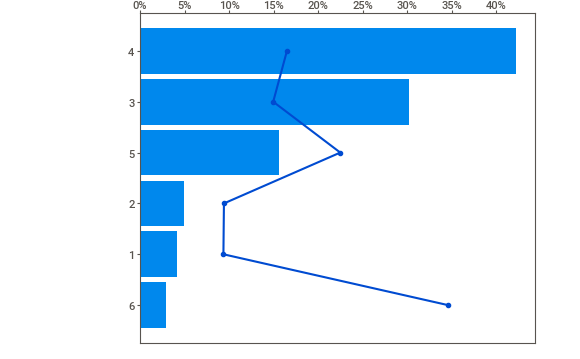
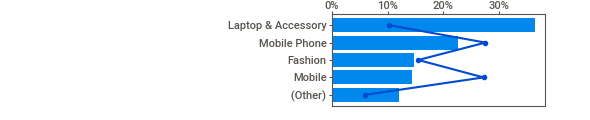
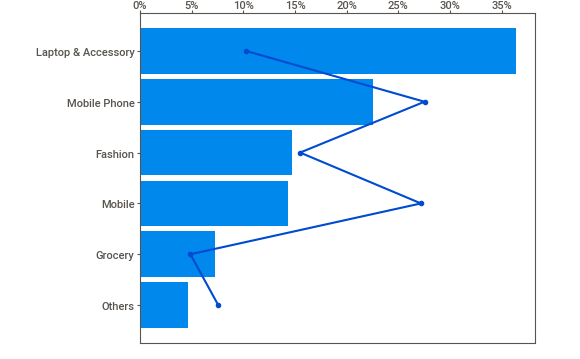
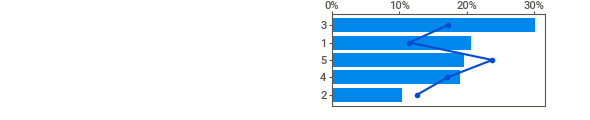
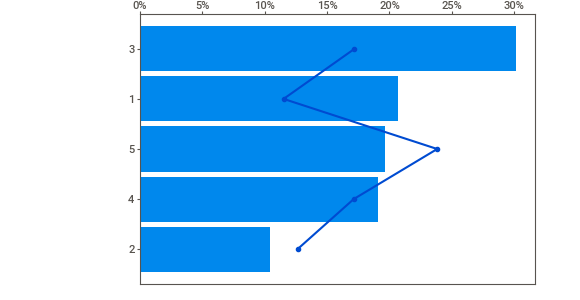
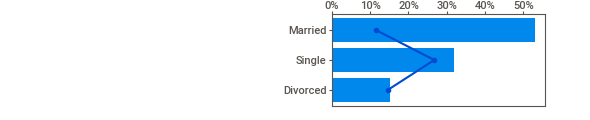
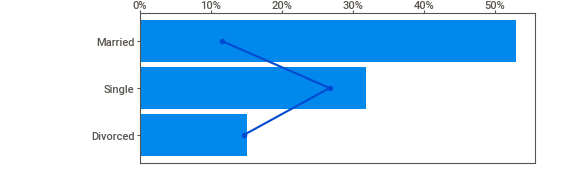
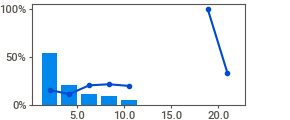
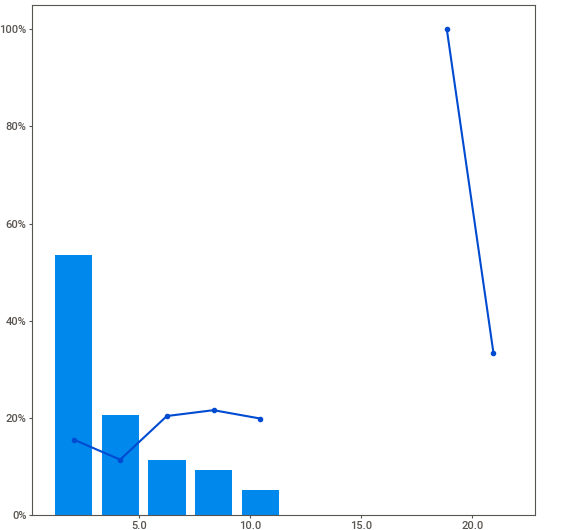
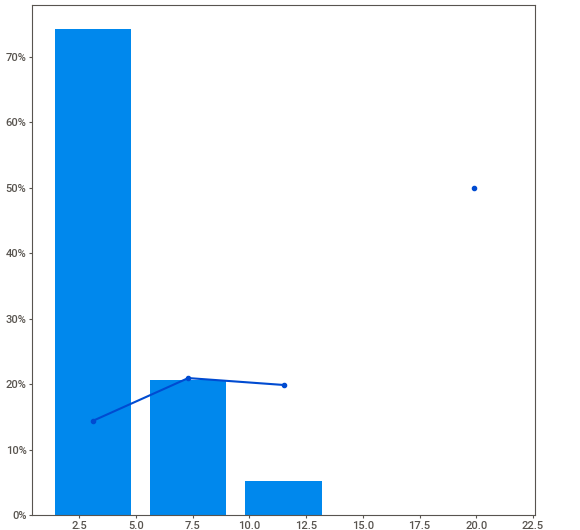
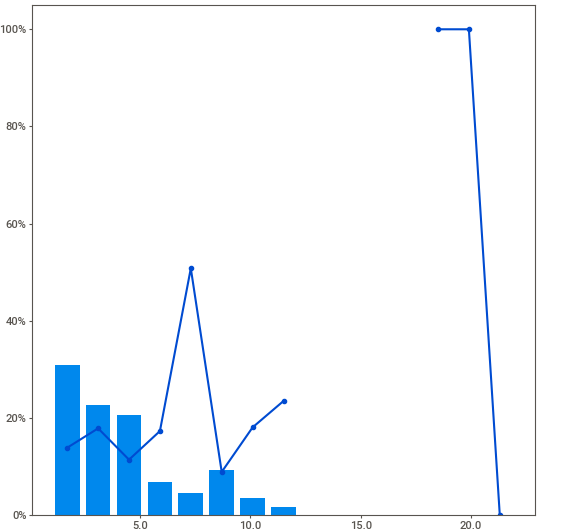
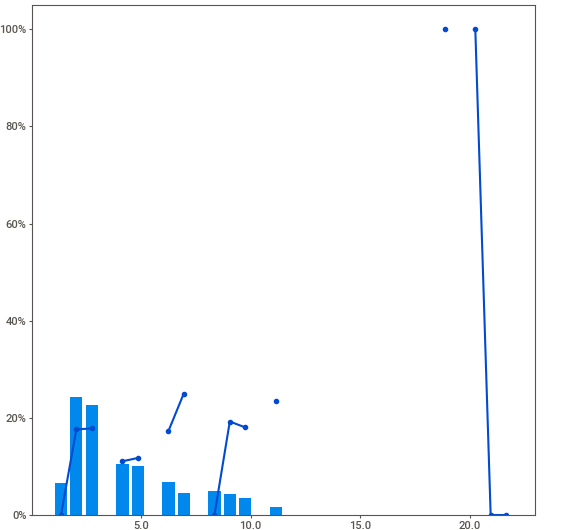
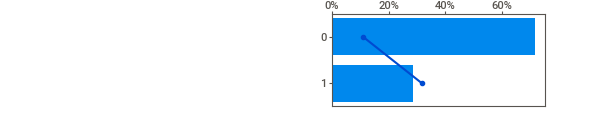
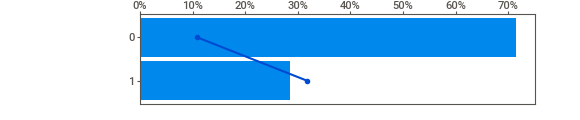
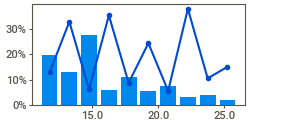
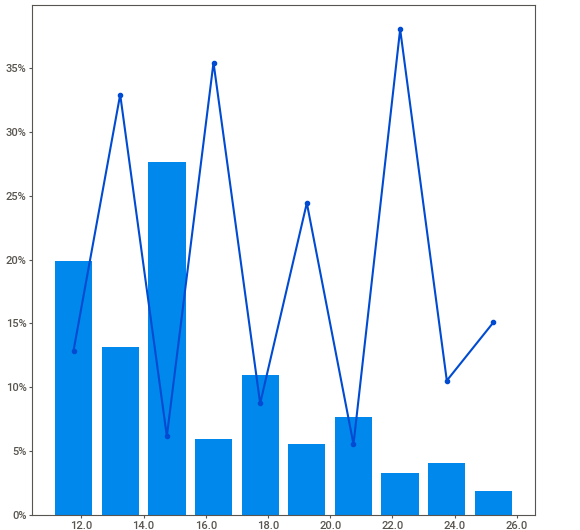
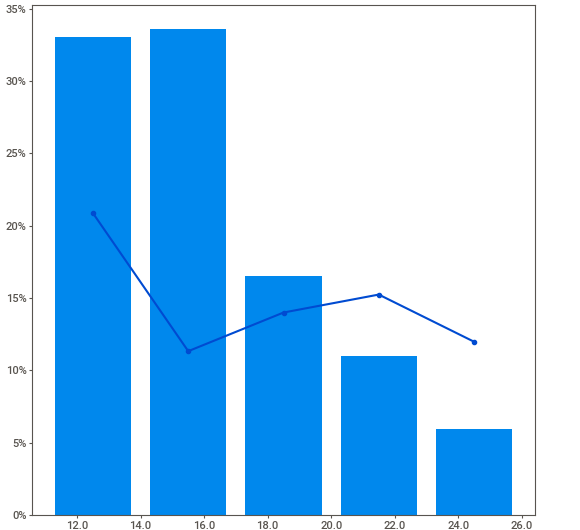
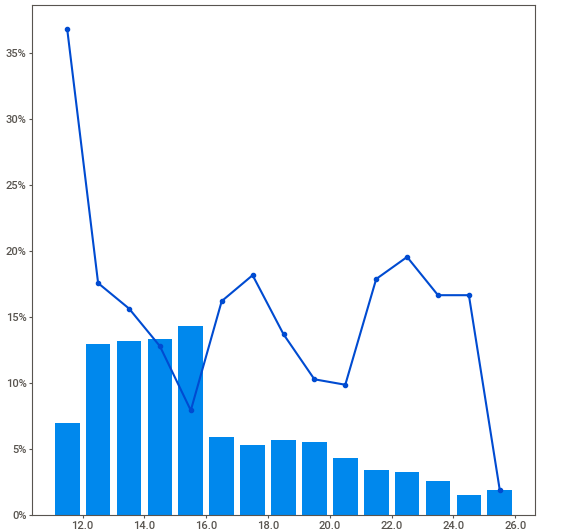
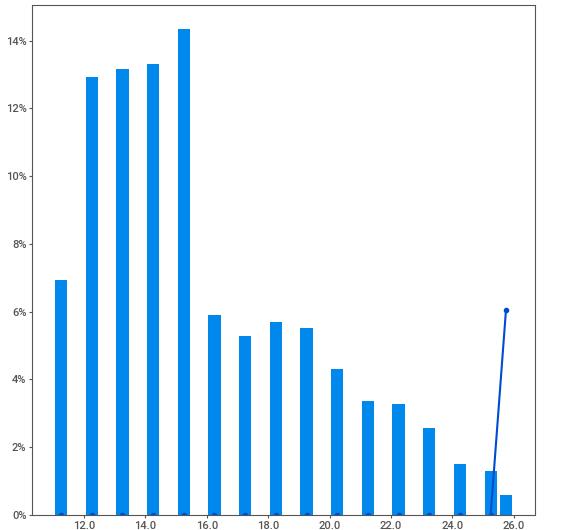
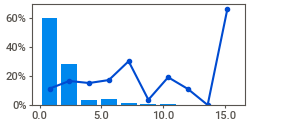
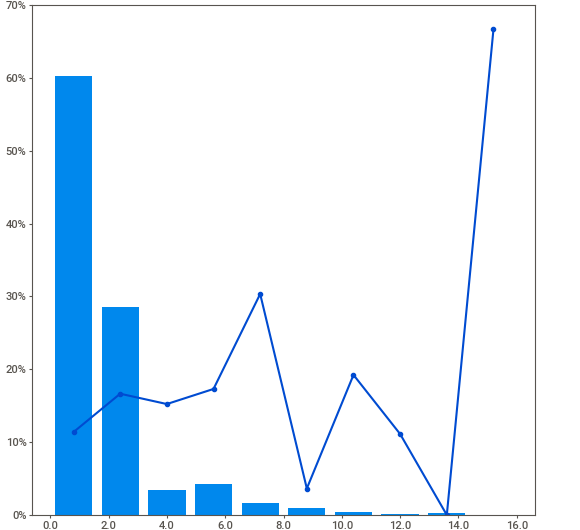
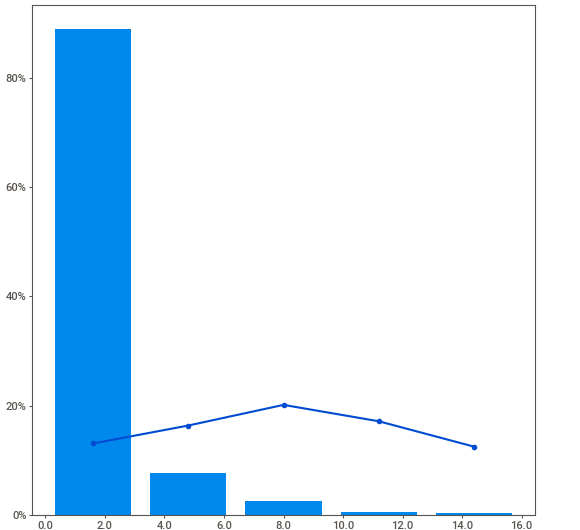
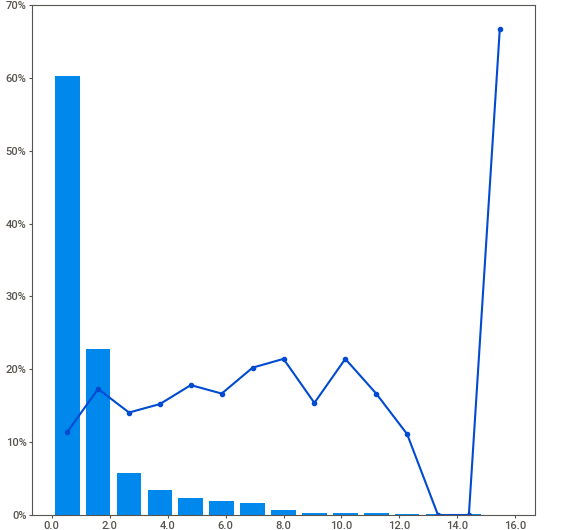
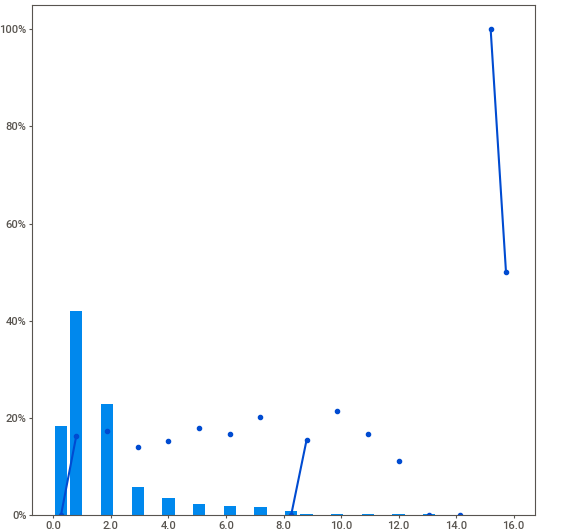
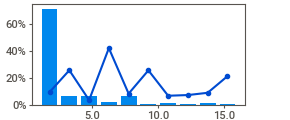
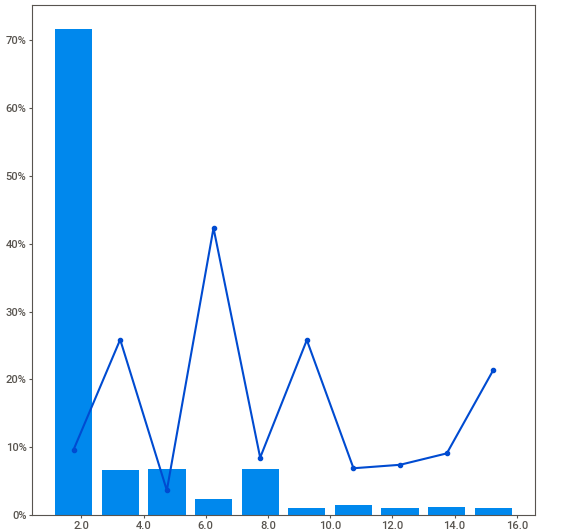
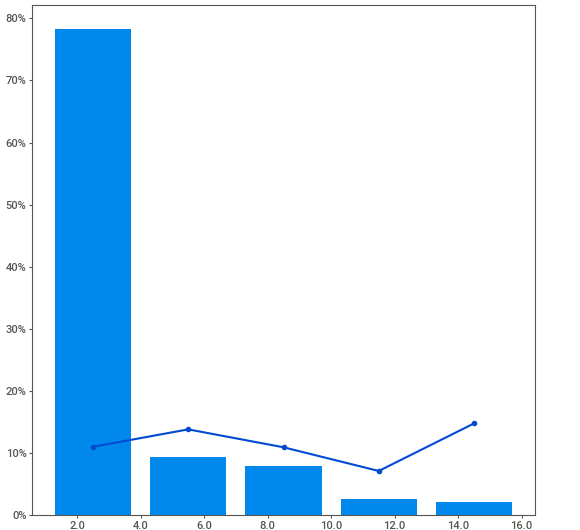
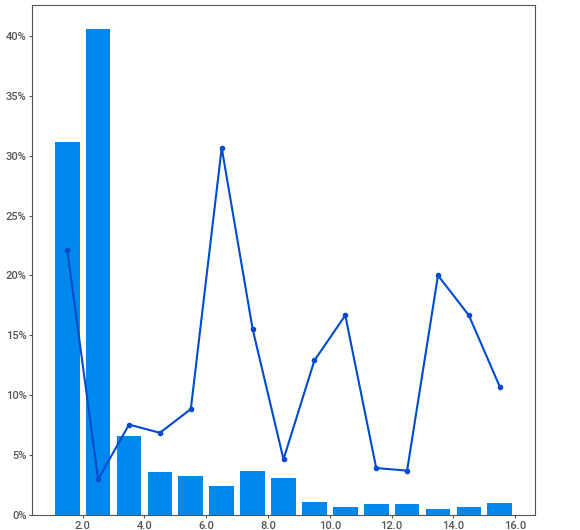
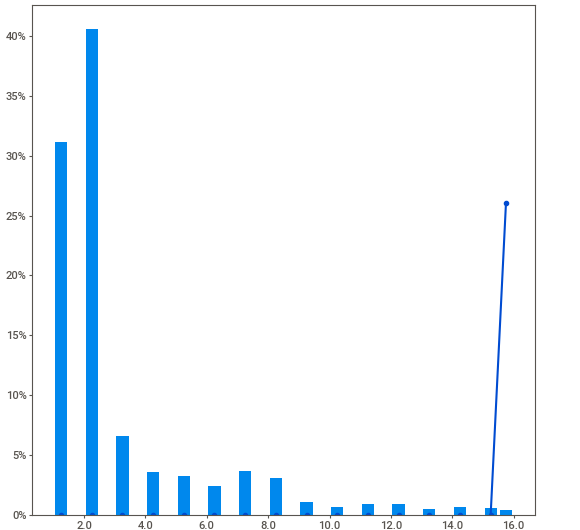
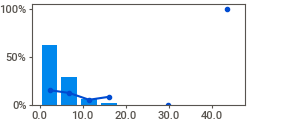
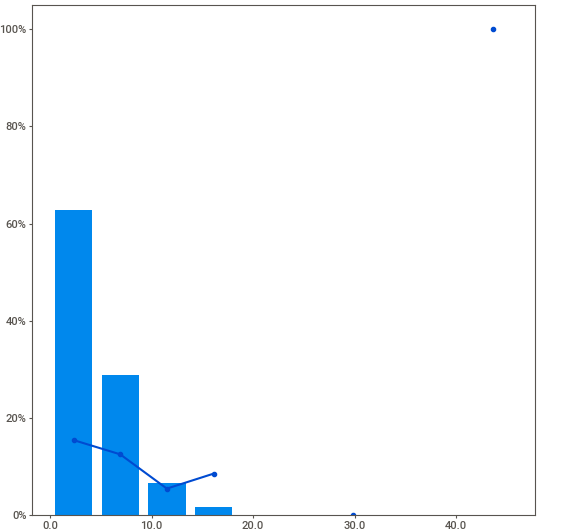
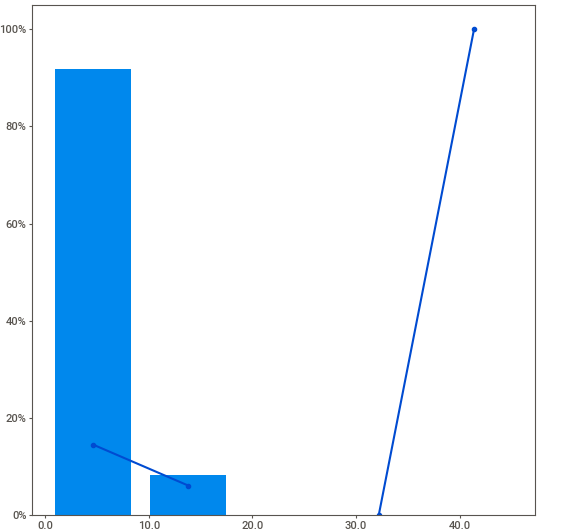
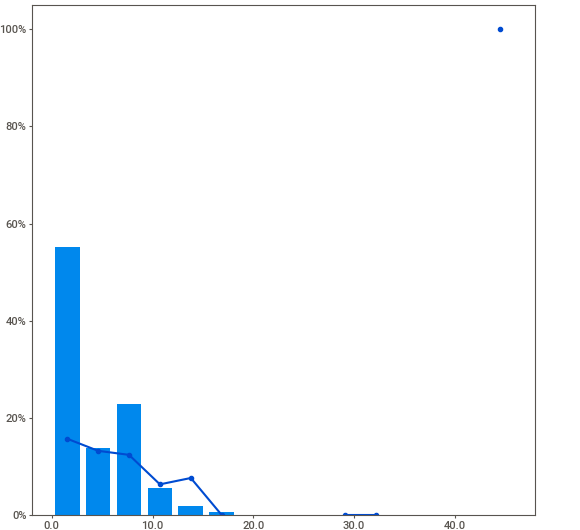
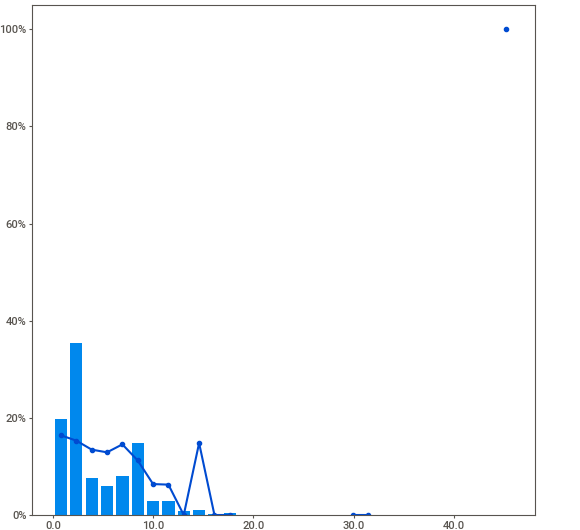
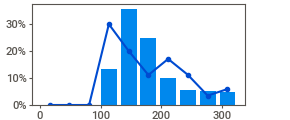
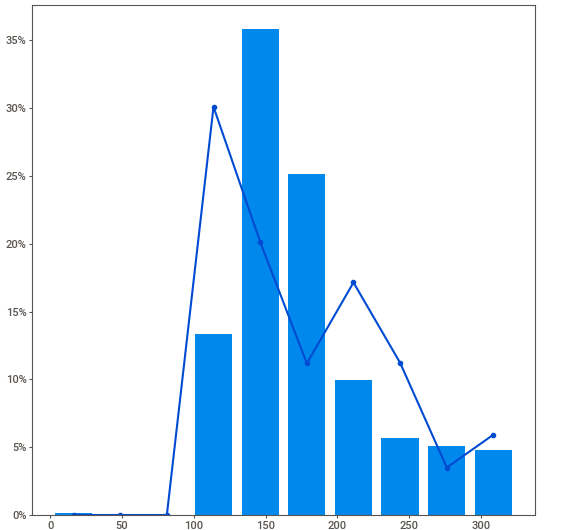
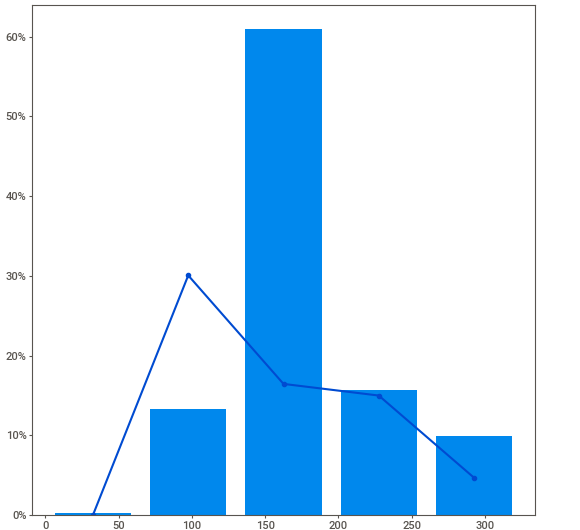
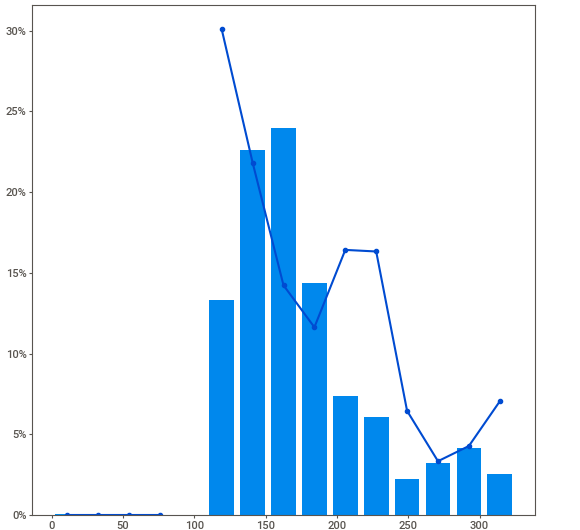
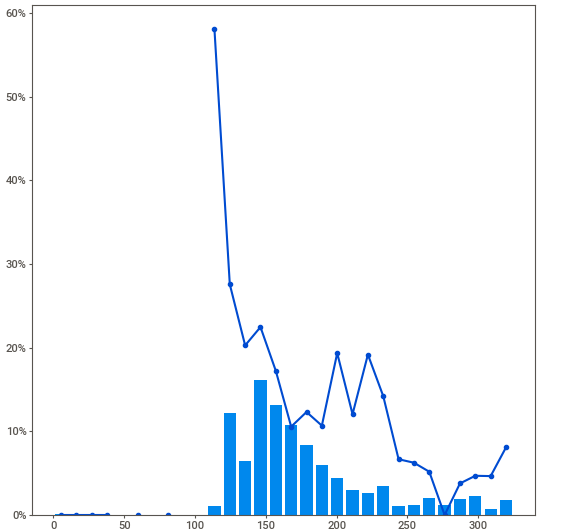
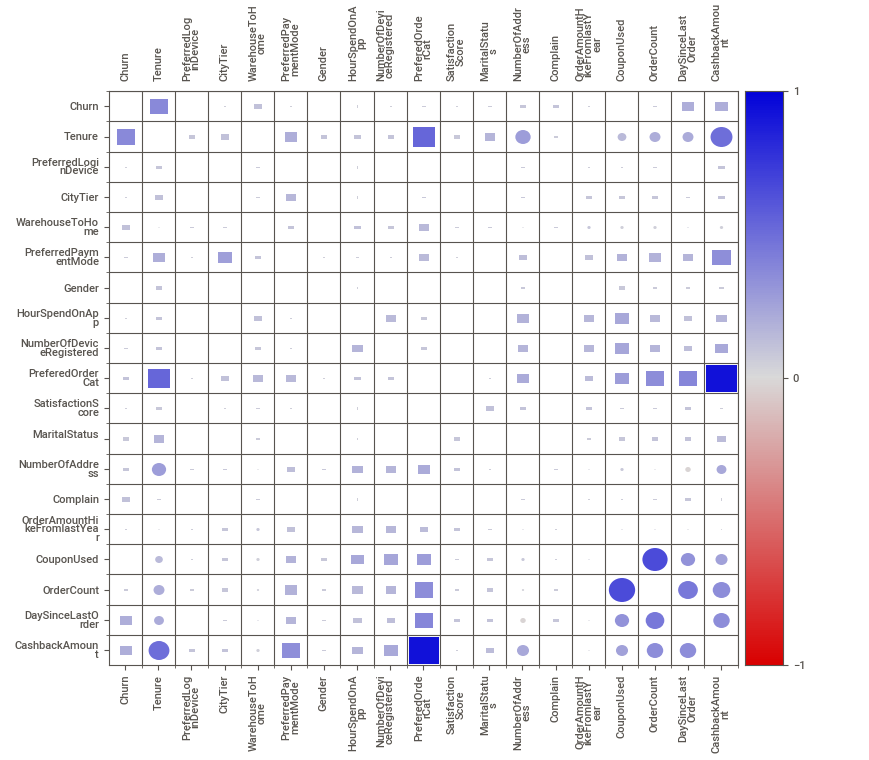
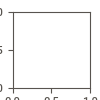

In [19]:
report.show_notebook(layout='widescreen', w=1500, h=700, scale = 0.8)

In [20]:
report.show_html('analyze.html', open_browser = True)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


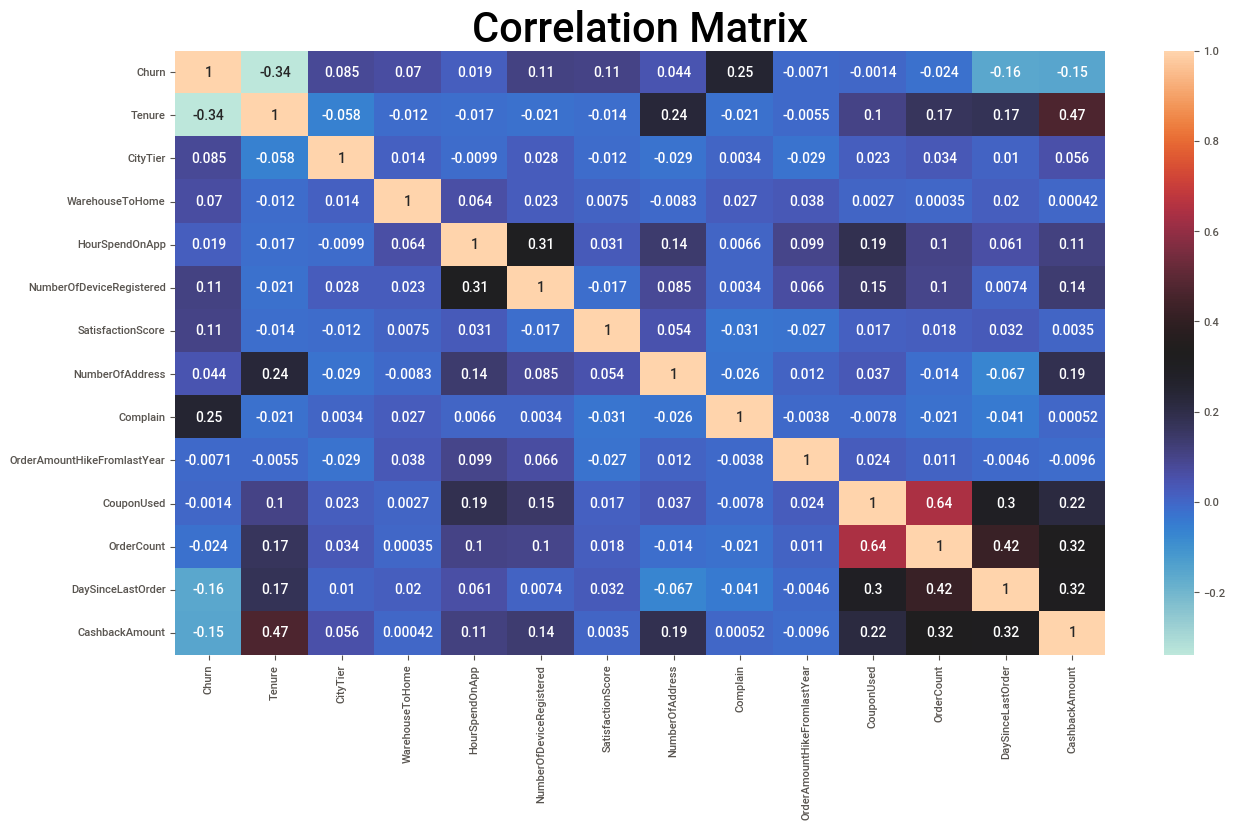

In [21]:
# visualize correlations
corr = df.corr()
plt.figure(figsize = (15, 8))
plt.title('Correlation Matrix', fontsize = 30)
sns.heatmap(corr, cmap = 'icefire', annot = True);

# scale 
# 0.20 - 0.39 weak
# 0.40 - 0.59 moderate
# 0.60 - 0.79 strong
# 0.80 - 1.00 very strong

# there is strong correlation between CouponUsed and OrderCount 0.64
# there is moderate correlation between CustomerID and HourSpendOnApp 0.58
# there is moderate correlation between Tenure and CashBackAmount 0.47
# there is moderate correlation between OrderCount and DaySinceLastOrder 0.42
# there is moderate correlation between CustomerID and NumberOfDeviceRegistered 0.41

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

Create some really cool charts

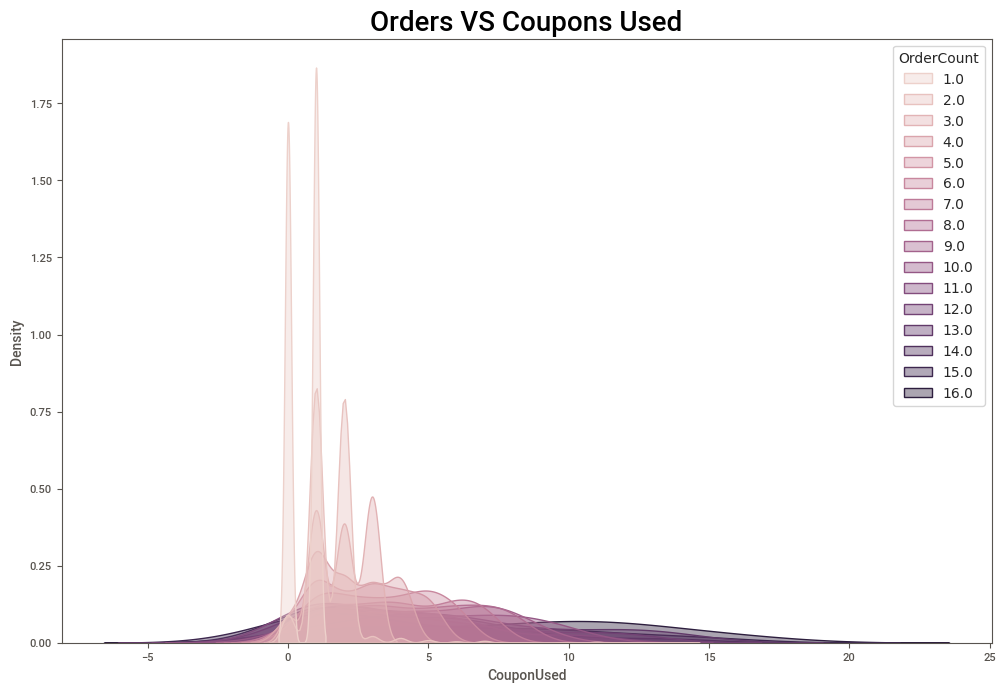

In [23]:
# Set figure size for the notebook
plt.rcParams['figure.figsize'] = 12, 8

# set title
plt.title('Orders VS Coupons Used', fontsize = 20);

# set seaborn whitegrid theme
sns.set_style('whitegrid', {'axes.grid' : False})

# Without transparency
sns.kdeplot(data = df, x = 'CouponUsed', hue = 'OrderCount', fill = True, common_norm = False, alpha = 0.4)
plt.show()

# there is strong correlation between CouponUsed and OrderCount 0.64

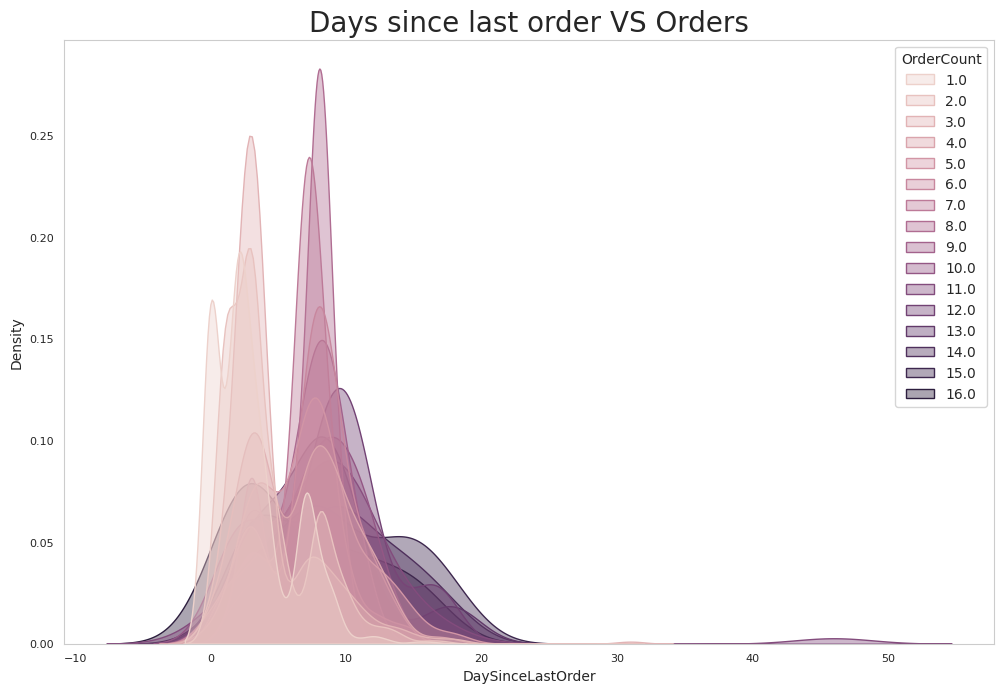

In [24]:
# Set figure size for the notebook
plt.rcParams['figure.figsize'] = 12, 8

# set title
plt.title('Days since last order VS Orders', fontsize = 20);

# set seaborn whitegrid theme
sns.set_style('whitegrid', {'axes.grid' : False})

# Without transparency
sns.kdeplot(data = df, x = 'DaySinceLastOrder', hue = 'OrderCount', fill = True, common_norm = False, alpha = 0.4)
plt.show()

# there is moderate correlation between OrderCount and DaySinceLastOrder 0.42

In [25]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Loyal customers tend to use more cashbacks

# Data Preparation

In [26]:
# create filter for all object cols
cat_cols = df.select_dtypes('object')
num_cols = df.select_dtypes('number')

In [27]:
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [28]:
# map categorical values into numbers

# for each categorical columns
cat_data = df[cat_selector(df)]

# for each categorical columns
for col_name in cat_data.columns:
    
    # print the column name
    print(col_name)

    # get unique values from that column
    values_list = df[col_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # display the index(position) and value
        #print(index, value)

        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    df[col_name].replace(col_dictionary, inplace=True)

PreferredLoginDevice
PreferredPaymentMode
Gender
PreferedOrderCat
MaritalStatus


# **MODELING**

In [29]:
# instantiate scaler
scaler = StandardScaler()

In [30]:
# fit and transform the data
scaled_df = scaler.fit_transform(df)

In [31]:
%%time
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2, 10)

# create empty arrays
sil = []
inertias = []

# loop through k values between 2 - 10
for k in ks:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(scaled_df)
  sil.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)

CPU times: user 20.4 s, sys: 4.4 s, total: 24.8 s
Wall time: 24.8 s


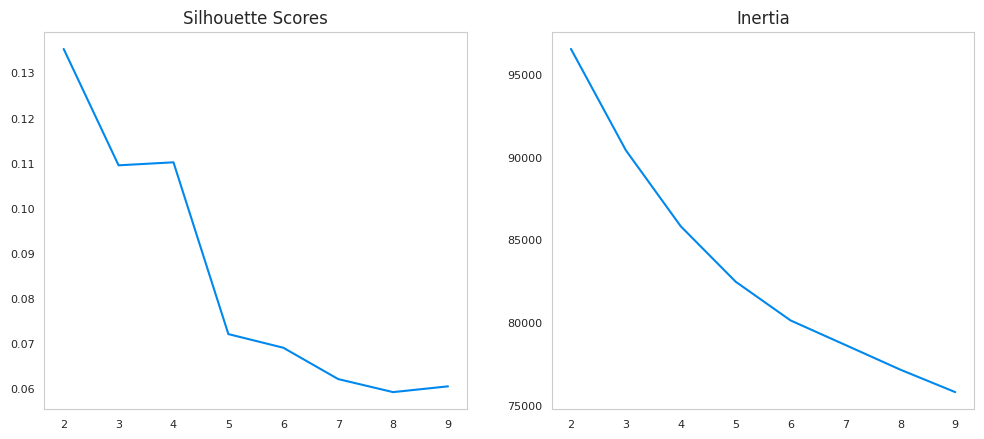

In [32]:
# plot the results of inertia and silhouette_scores
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
axes[0].plot(ks, sil)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

The silhouette score suggests that 2 is the best number of clusters for this dataset

The elbow plot suggests that 5 is where the curve slightly deviates from the trend

I will use 2 clusters, though 5 based on the elbow might be good too.

In [33]:
# fit kmeans model with best 2 clusters based on silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

# test results
# n_clusters 2 0.127488565685968
# n_clusters 5 0.08853123493679203

0.13518284916240889

When using the best silhouette score of 2 with a score of 0.127488565685968

In [34]:
# define cluster
df['cluster'] = kmeans.labels_

# group clusters based on best silhouette_score (n_clusters = 2)
clusters_grouped = df.groupby('cluster').mean()
clusters_grouped

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
cluster,,,,,,,,,,,,,,,,,,,
0,0.199606,7.620970,0.303470,1.650505,15.615801,2.517844,0.620724,2.913118,3.645336,0.958897,3.053409,1.162688,4.015752,0.285503,15.725818,1.259414,2.117893,3.643613,154.530074
1,0.087428,16.650287,0.255903,1.665603,15.439694,2.848756,0.550096,2.990428,3.802170,3.574346,3.101468,1.337588,4.728143,0.283344,15.541800,2.902999,5.149968,6.574346,236.062521


Cluster 0 are generally loyal customers, and have been on the platform longer. They spend more time on the app and take advantage of coupons and as a result order more items. They do however take longer times between shopping and have higher cashbacks which might suggests that they take advantage of sales or promotional periods.

features:
lower churn
higher tenure
more hours spent on app
more coupons used
more orders
have higher intervals during purchases
higher cashback amount

Cluster 1 on the other hand have a higher churn and have been on the platform shorter than cluster 0. They also spend less time on the app, they use fewer coupons and are more frequent shoppers with lower cashbacks.

In [35]:
# define target y and features X
y = df['Churn']
X = df.drop(columns = ['Churn', 'cluster'])
X.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,0,3,6.0,0,0,3.0,3,0,2,0,9,1,11.0,1.0,1.0,5.0,159.93
1,9.0,0,1,8.0,1,1,3.0,4,1,3,0,7,1,15.0,0.0,1.0,0.0,120.90
2,9.0,0,1,30.0,0,1,2.0,4,1,3,0,6,1,14.0,0.0,1.0,3.0,120.28
3,0.0,0,3,15.0,0,1,2.0,4,0,5,0,8,0,23.0,0.0,1.0,3.0,134.07
4,0.0,0,1,12.0,2,1,3.0,3,1,5,0,3,0,11.0,1.0,1.0,3.0,129.60


In [36]:
# split the model using random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
# fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# apply PCA to reduce number of features
# instantiate the model
pca = PCA()

# fit the model
pca.fit(X_train_scaled)

PCA()

In [39]:
# count number cols to be reduced
X_train.shape

(4222, 18)

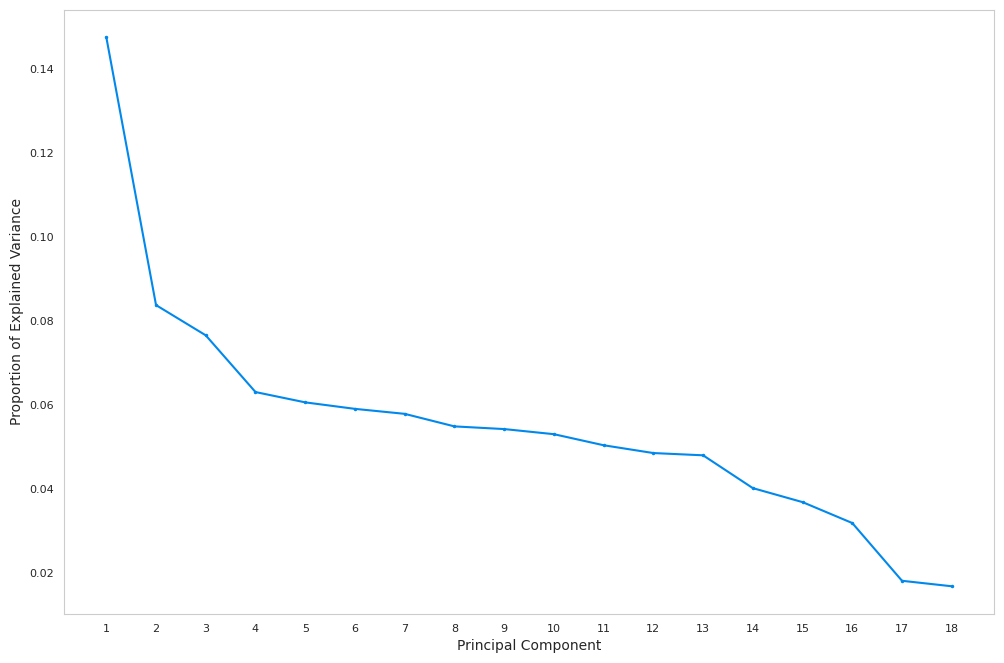

In [40]:
# visualize scree plot find the point where the graph breaks to flatten
plt.plot(range(1, 19), pca.explained_variance_ratio_[:19], marker = '.')
plt.xticks(ticks = range(1, 19), fontsize = 8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

Based on the above scree plot I might choose either 2, or 4 components to keep. I will choose 4 this time. I might try 2 to see its effect on accuracy and training time.

In [41]:
# apply pca to reduce the number of features to 4
pca4 = PCA(n_components = 4)

In [42]:
# fit the model to X_train_scaled
X_train_pca = pca4.fit_transform(X_train_scaled)
X_test_pca = pca4.transform(X_test_scaled)

In [43]:
# Report the how many fewer columns are present after PCA.
difference = X_train.shape[1] - X_train_pca.shape[1]
print(f'There are {difference} fewer columns after applying PCA')

There are 14 fewer columns after applying PCA


In [44]:
# Report the amount of variance retained after PCA.
variance = pca4.explained_variance_ratio_.sum()
print(f'The pca explains {variance:.2f} percent of the variance of the original data')

The pca explains 0.37 percent of the variance of the original data


In [45]:
pca4 = PCA(n_components = 0.39)

In [46]:
# define a function that takes true and predicted values as arguments
# and prints all 4 metrics

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [47]:
# define neural network structure
input_shape = X_train_pca.shape[1]
input_shape

4

In [48]:
# instantiate the model
model1 = Sequential()

# add first hidden layer
model1.add(Dense(10, input_dim = X_train_pca.shape[1],
                activation = 'relu'))

# add output layer
model1.add(Dense(1, activation = 'sigmoid'))

# compile the model
model1.compile(loss='bce', optimizer='adam', metrics=['acc'])

In [49]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

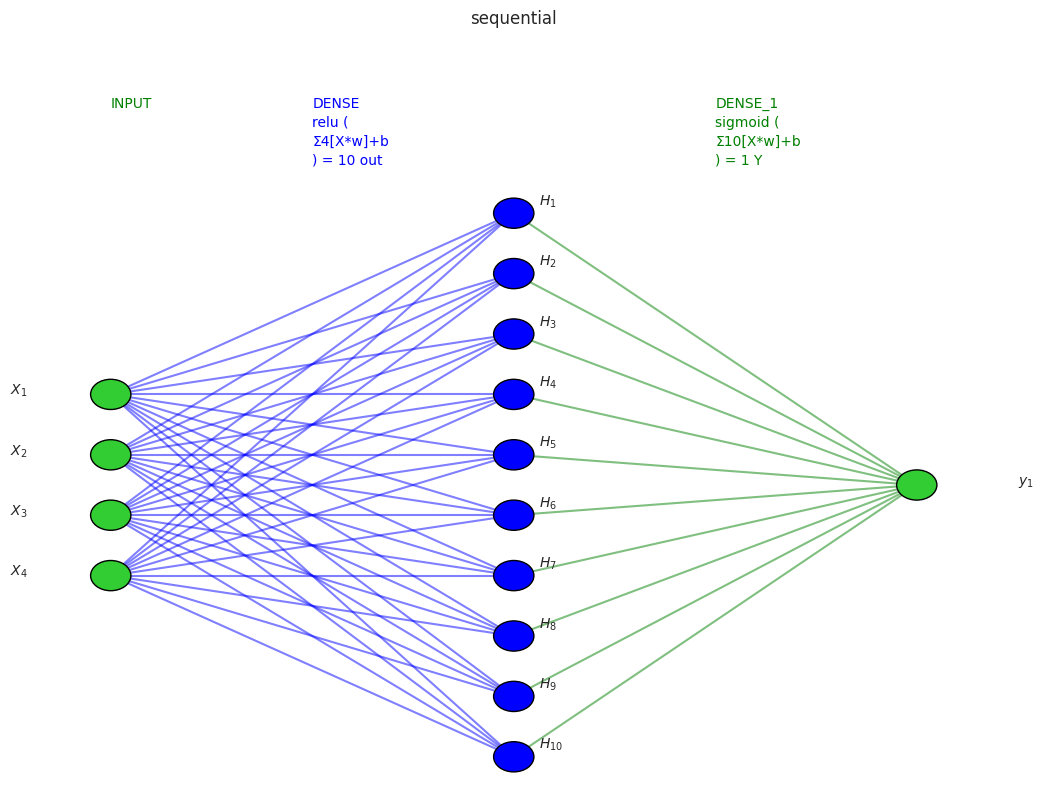

In [50]:
visualize_nn(model1, description=True, figsize=(13,10))

In [51]:
%%time
# fit the model
history = model1.fit(X_train_pca, y_train,
                  validation_data = (X_test_pca, y_test),
                  epochs = 30)

Epoch 1/30
132/132 [==============================] - 3s 8ms/step - loss: 0.6149 - acc: 0.6409 - val_loss: 0.5036 - val_acc: 0.7770
Epoch 2/30
132/132 [==============================] - 1s 5ms/step - loss: 0.4733 - acc: 0.8058 - val_loss: 0.4413 - val_acc: 0.8352
Epoch 3/30
132/132 [==============================] - 1s 6ms/step - loss: 0.4370 - acc: 0.8321 - val_loss: 0.4264 - val_acc: 0.8338
Epoch 4/30
132/132 [==============================] - 1s 7ms/step - loss: 0.4263 - acc: 0.8318 - val_loss: 0.4223 - val_acc: 0.8331
Epoch 5/30
132/132 [==============================] - 1s 6ms/step - loss: 0.4218 - acc: 0.8318 - val_loss: 0.4204 - val_acc: 0.8338
Epoch 6/30
132/132 [==============================] - 1s 5ms/step - loss: 0.4188 - acc: 0.8318 - val_loss: 0.4189 - val_acc: 0.8338
Epoch 7/30
132/132 [==============================] - 1s 6ms/step - loss: 0.4161 - acc: 0.8321 - val_loss: 0.4169 - val_acc: 0.8338
Epoch 8/30
132/132 [==============================] - 1s 5ms/step - loss: 0.

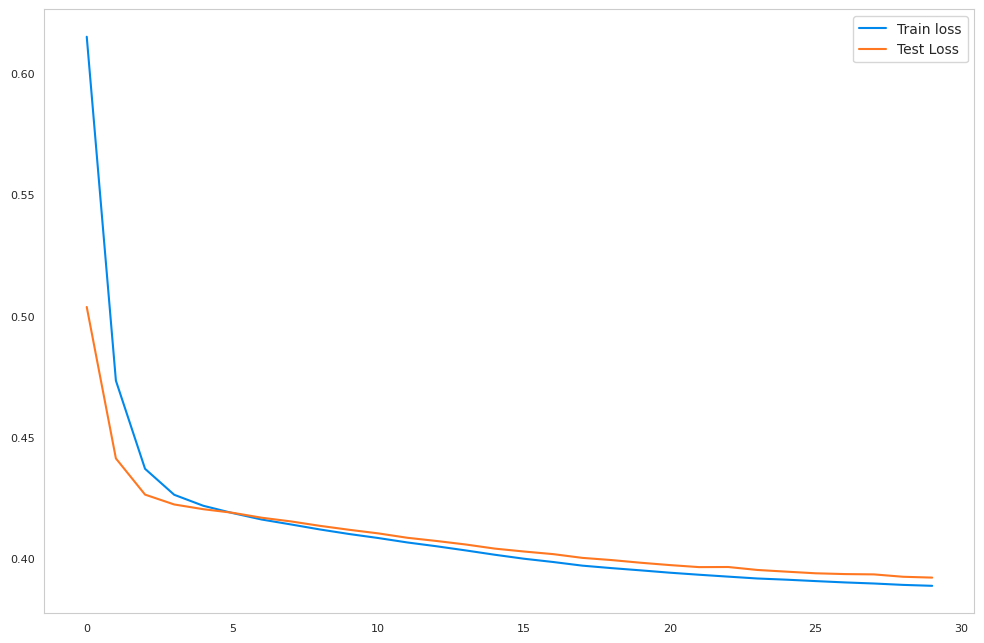

In [52]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

In [53]:
# create metrics
preds = np.rint(model1.predict(X_test_pca))

print(classification_report(y_test, preds))

44/44 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1172
           1       0.79      0.13      0.22       236

    accuracy                           0.85      1408
   macro avg       0.82      0.56      0.57      1408
weighted avg       0.84      0.85      0.80      1408



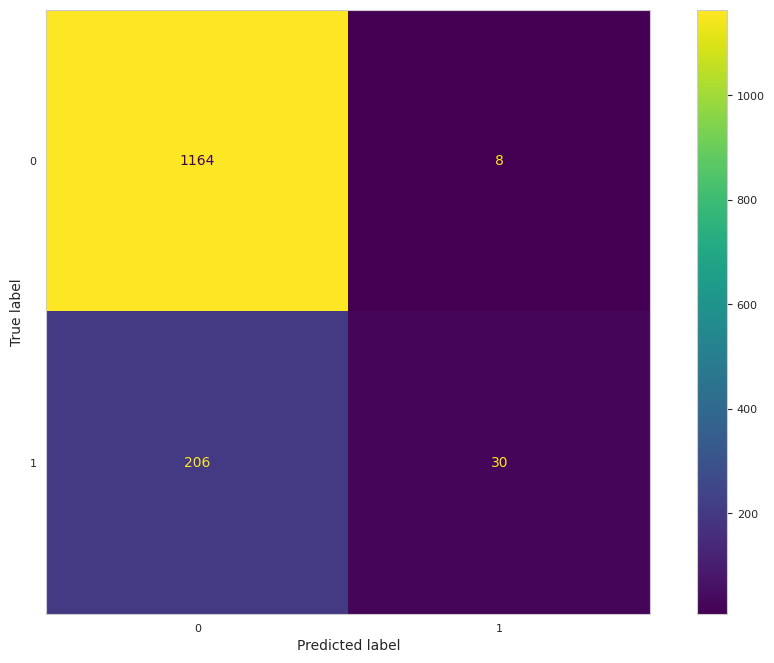

In [54]:
# create confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds);

# **Second model with two hidden layers**

In [55]:
# instantiate the model
model2 = Sequential()

# add first hidden layer
model2.add(Dense(100, input_dim = X_train_pca.shape[1],
                activation = 'relu'))

# add second hidden layer
model2.add(Dense(50, activation = 'relu'))

# add output layer
model2.add(Dense(1, activation = 'sigmoid'))

# compile the model
model2.compile(loss='bce', optimizer='adam', metrics=['acc'])

In [56]:
%%time
# fit the model
history = model2.fit(X_train_pca, y_train,
                  validation_data = (X_test_pca, y_test),
                  epochs = 100)

Epoch 1/100
132/132 [==============================] - 2s 7ms/step - loss: 0.4536 - acc: 0.8285 - val_loss: 0.4252 - val_acc: 0.8324
Epoch 2/100
132/132 [==============================] - 1s 7ms/step - loss: 0.4155 - acc: 0.8321 - val_loss: 0.4077 - val_acc: 0.8338
Epoch 3/100
132/132 [==============================] - 1s 5ms/step - loss: 0.4024 - acc: 0.8349 - val_loss: 0.4001 - val_acc: 0.8338
Epoch 4/100
132/132 [==============================] - 1s 5ms/step - loss: 0.3934 - acc: 0.8389 - val_loss: 0.4011 - val_acc: 0.8338
Epoch 5/100
132/132 [==============================] - 0s 4ms/step - loss: 0.3885 - acc: 0.8434 - val_loss: 0.3896 - val_acc: 0.8388
Epoch 6/100
132/132 [==============================] - 1s 5ms/step - loss: 0.3836 - acc: 0.8425 - val_loss: 0.3900 - val_acc: 0.8359
Epoch 7/100
132/132 [==============================] - 1s 5ms/step - loss: 0.3808 - acc: 0.8439 - val_loss: 0.3859 - val_acc: 0.8416
Epoch 8/100
132/132 [==============================] - 1s 6ms/step - 

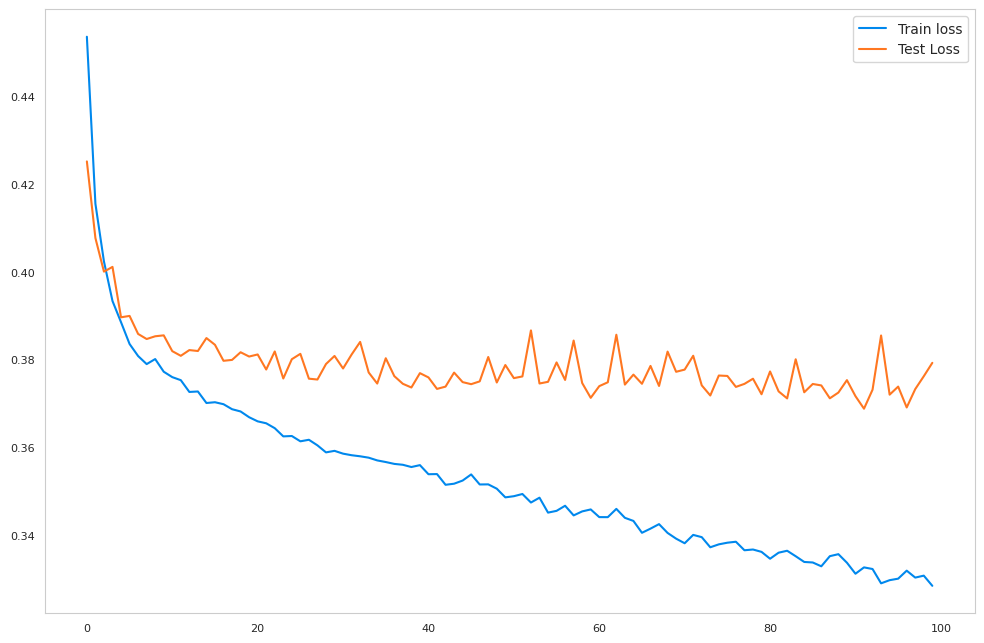

In [57]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

In [58]:
# create metrics
preds = np.rint(model2.predict(X_test_pca))

print(classification_report(y_test, preds))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1172
           1       0.54      0.32      0.40       236

    accuracy                           0.84      1408
   macro avg       0.71      0.63      0.66      1408
weighted avg       0.82      0.84      0.82      1408



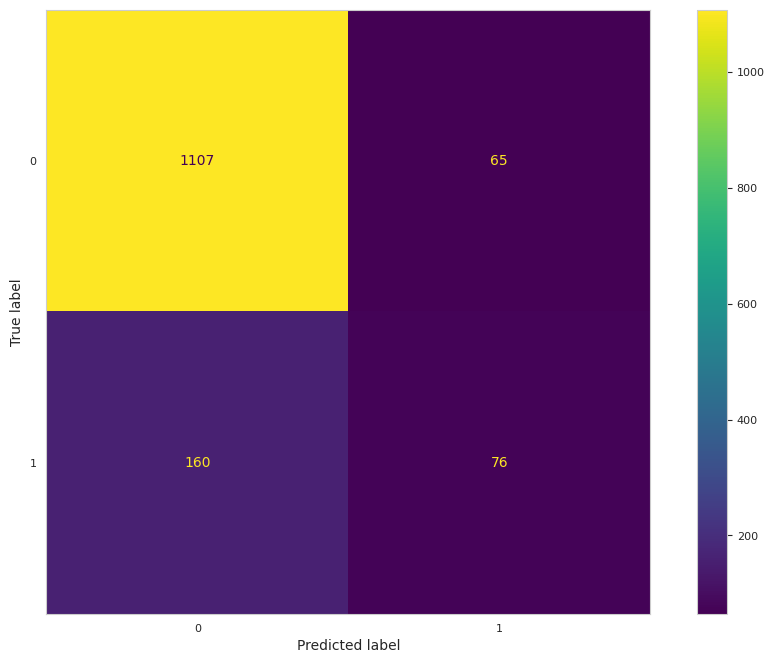

In [59]:
# create confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds);

# **Third model with one hidden layer and dropout**

In [60]:
# instantiate the model
model3 = Sequential()

# add first hidden layer
model3.add(Dense(1000, input_dim = input_shape, activation = 'relu'))

# add dropout
model3.add(Dropout(.3))

# add output layer
model3.add(Dense(1, activation = 'sigmoid'))

# compile the model
model3.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])

In [61]:
%%time
# fit the model
history = model3.fit(X_train_pca, y_train,
                  validation_data = (X_test_pca, y_test),
                  epochs = 30)

Epoch 1/30
132/132 [==============================] - 2s 12ms/step - loss: 0.4506 - acc: 0.8271 - val_loss: 0.4225 - val_acc: 0.8359
Epoch 2/30
132/132 [==============================] - 1s 8ms/step - loss: 0.4114 - acc: 0.8333 - val_loss: 0.4017 - val_acc: 0.8352
Epoch 3/30
132/132 [==============================] - 1s 4ms/step - loss: 0.3995 - acc: 0.8340 - val_loss: 0.4037 - val_acc: 0.8303
Epoch 4/30
132/132 [==============================] - 1s 4ms/step - loss: 0.3946 - acc: 0.8382 - val_loss: 0.3917 - val_acc: 0.8445
Epoch 5/30
132/132 [==============================] - 1s 4ms/step - loss: 0.3903 - acc: 0.8411 - val_loss: 0.3911 - val_acc: 0.8438
Epoch 6/30
132/132 [==============================] - 1s 5ms/step - loss: 0.3912 - acc: 0.8394 - val_loss: 0.3920 - val_acc: 0.8438
Epoch 7/30
132/132 [==============================] - 1s 7ms/step - loss: 0.3885 - acc: 0.8415 - val_loss: 0.3882 - val_acc: 0.8430
Epoch 8/30
132/132 [==============================] - 1s 7ms/step - loss: 0

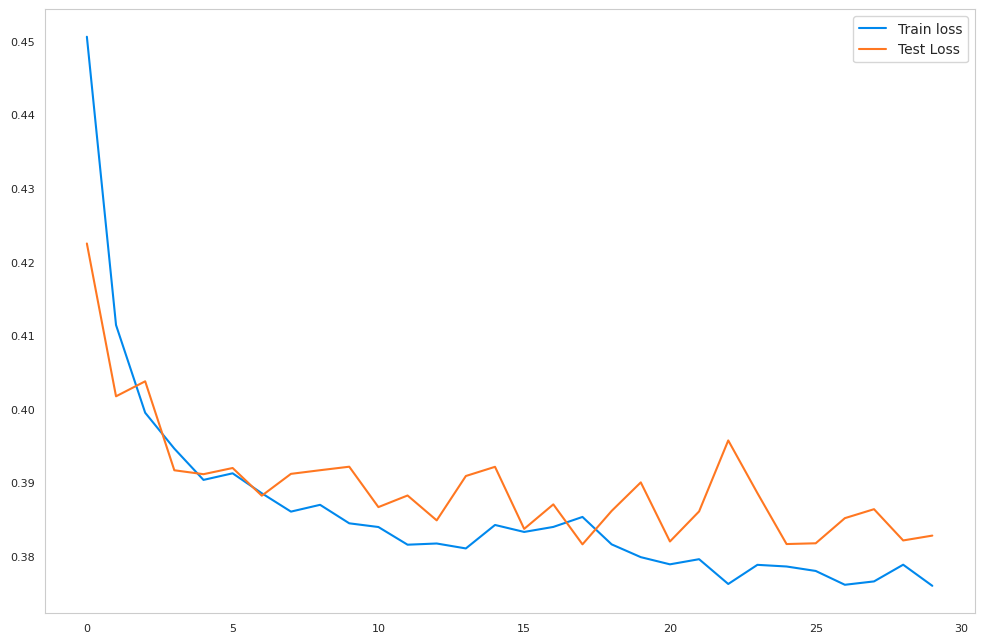

In [62]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

In [63]:
# create metrics
preds = np.rint(model3.predict(X_test_pca))

print(classification_report(y_test, preds))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1172
           1       0.65      0.15      0.25       236

    accuracy                           0.84      1408
   macro avg       0.75      0.57      0.58      1408
weighted avg       0.82      0.84      0.80      1408



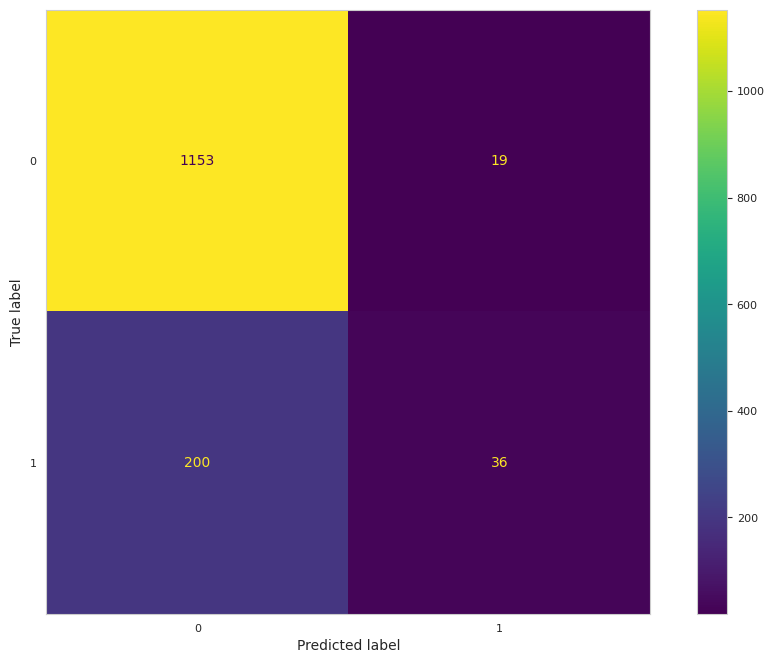

In [64]:
# create confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds);

# **MACHINE LEARNING**

Data Preparation

In [65]:
# create pipelines
nom_pipe = make_pipeline(scaler)
num_pipe = make_pipeline(scaler)

In [66]:
# set tuples
cat_tuple = (nom_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)

In [67]:
# instantitate the transformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [68]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdf5c256a00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdf5c256040>)])

In [69]:
# transform the processed data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# **Random Forest Classifier**

In [70]:
# insantiate the model
rfc = RandomForestClassifier()

# fit the model
rfc.fit(X_train_processed, y_train)

# create prediction
trained_class_score = rfc.score(X_train_processed, y_train)
print(f'train score {trained_class_score}')

tested_class_score = rfc.score(X_test_processed, y_test)
print(f'test score {tested_class_score}')

train score 1.0
test score 0.9772727272727273


In [71]:
train_pred = rfc.predict(X_train_processed)
test_pred = rfc.predict(X_test_processed)

print('training scores')
print(classification_report(y_train, train_pred))

print('testing scores')
print(classification_report(y_test, test_pred));

training scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3510
           1       1.00      1.00      1.00       712

    accuracy                           1.00      4222
   macro avg       1.00      1.00      1.00      4222
weighted avg       1.00      1.00      1.00      4222

testing scores
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1172
           1       0.97      0.89      0.93       236

    accuracy                           0.98      1408
   macro avg       0.98      0.94      0.96      1408
weighted avg       0.98      0.98      0.98      1408



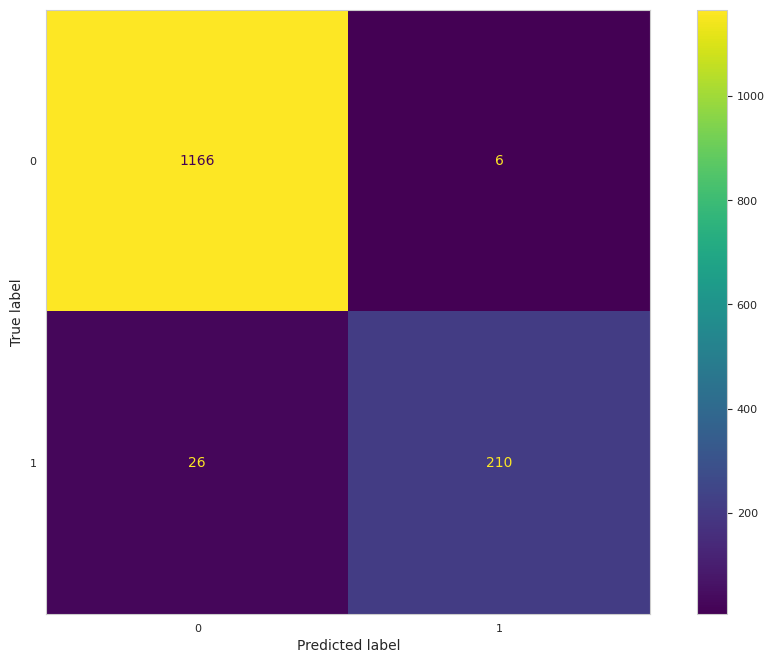

In [72]:
# create confusion matrics
ConfusionMatrixDisplay.from_predictions(y_test, test_pred);

# **Random Forest Classifier Model Tuning**

In [73]:
# get hyperparameters 
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
# using n_estimators as hyperparameter for model tuning
# create list of values
rfc_range = list(range(1, 20))

# create list to store scores for each max_depth value
r2 = []

# create loop to test all ranges from max_depth_range
for depth in rfc_range:
  rfc = RandomForestClassifier(max_depth = depth)
  rfc.fit(X_train, y_train)
  score = rfc.score(X_test, y_test)
  r2.append(score)

In [75]:
# find best r2
print(np.sort(r2))

[0.83238636 0.83238636 0.85440341 0.87428977 0.88920455 0.90553977
 0.91832386 0.92400568 0.94105114 0.94886364 0.953125   0.96235795
 0.96235795 0.97088068 0.97159091 0.97159091 0.97230114 0.97514205
 0.97514205]


In [76]:
# find best value for max_depth = 1
for i in enumerate(r2):
  print([i])

[(0, 0.8323863636363636)]
[(1, 0.8323863636363636)]
[(2, 0.8544034090909091)]
[(3, 0.8742897727272727)]
[(4, 0.8892045454545454)]
[(5, 0.9055397727272727)]
[(6, 0.9183238636363636)]
[(7, 0.9240056818181818)]
[(8, 0.9410511363636364)]
[(9, 0.9488636363636364)]
[(10, 0.953125)]
[(11, 0.9623579545454546)]
[(12, 0.9623579545454546)]
[(13, 0.9715909090909091)]
[(14, 0.9715909090909091)]
[(15, 0.9723011363636364)]
[(16, 0.9751420454545454)]
[(17, 0.9708806818181818)]
[(18, 0.9751420454545454)]


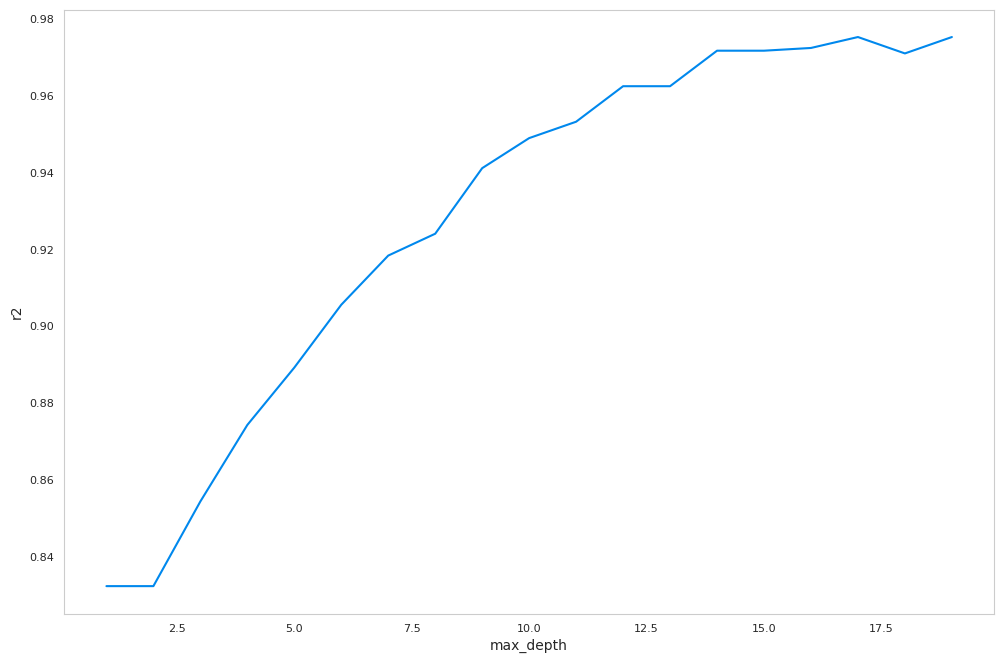

In [77]:
# visualize the results
plt.plot(rfc_range, r2)
plt.xlabel('max_depth')
plt.ylabel('r2');

In [78]:
rfc = RandomForestClassifier(max_depth = 16)

# fit the model
rfc.fit(X_train_processed, y_train)

# create prediction
trained_class_score = rfc.score(X_train_processed, y_train)
print(f'train score {trained_class_score}')

tested_class_score = rfc.score(X_test_processed, y_test)
print(f'test score {tested_class_score}')

train score 1.0
test score 0.9744318181818182


In [79]:
train_pred = rfc.predict(X_train_processed)
test_pred = rfc.predict(X_test_processed)

print('training scores')
print(classification_report(y_train, train_pred))

print('testing scores')
print(classification_report(y_test, test_pred));

training scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3510
           1       1.00      1.00      1.00       712

    accuracy                           1.00      4222
   macro avg       1.00      1.00      1.00      4222
weighted avg       1.00      1.00      1.00      4222

testing scores
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1172
           1       0.97      0.88      0.92       236

    accuracy                           0.97      1408
   macro avg       0.97      0.94      0.95      1408
weighted avg       0.97      0.97      0.97      1408



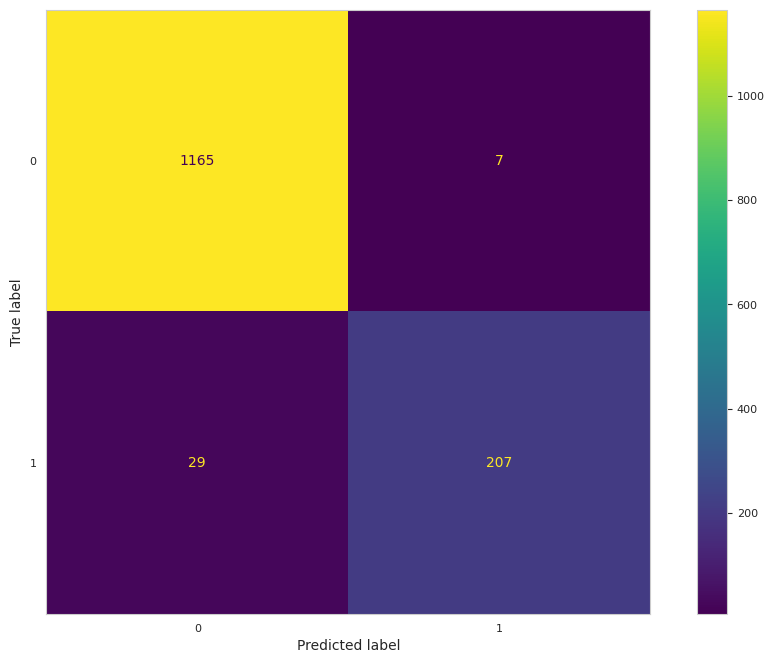

In [80]:
# create confusion matrics
ConfusionMatrixDisplay.from_predictions(y_test, test_pred);

# **XGBoost Classifier**

In [81]:
# instantiate model
xgb = XGBClassifier()

# get hyperparameters
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [82]:
# using n_estimators as hyperparameter for model tuning
# create list of values
xgb_range = list(range(1, 20))

# create list to store scores for each max_depth value
r2 = []

# create loop to test all ranges from max_depth_range
for depth in xgb_range:
  xgb = XGBClassifier(max_depth = depth)
  xgb.fit(X_train, y_train)
  score = xgb.score(X_test, y_test)
  r2.append(score)

In [83]:
# find best r2
print(np.sort(r2))

[0.88991477 0.90198864 0.91903409 0.9296875  0.93678977 0.953125
 0.96306818 0.97088068 0.97443182 0.97585227 0.97585227 0.97798295
 0.97798295 0.97798295 0.97798295 0.97798295 0.97940341 0.97940341
 0.97940341]


In [84]:
# find best value for max_depth = 1
for i in enumerate(r2):
  print([i])

[(0, 0.8899147727272727)]
[(1, 0.9019886363636364)]
[(2, 0.9190340909090909)]
[(3, 0.9296875)]
[(4, 0.9367897727272727)]
[(5, 0.953125)]
[(6, 0.9630681818181818)]
[(7, 0.9708806818181818)]
[(8, 0.9744318181818182)]
[(9, 0.9758522727272727)]
[(10, 0.9779829545454546)]
[(11, 0.9779829545454546)]
[(12, 0.9794034090909091)]
[(13, 0.9758522727272727)]
[(14, 0.9794034090909091)]
[(15, 0.9794034090909091)]
[(16, 0.9779829545454546)]
[(17, 0.9779829545454546)]
[(18, 0.9779829545454546)]


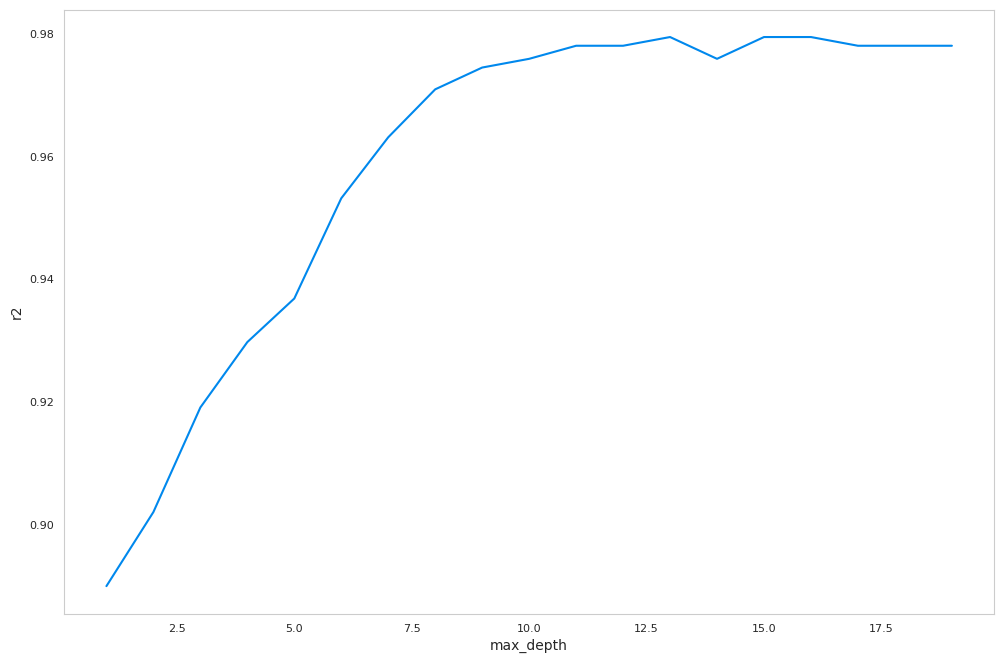

In [85]:
# visualize the results
plt.plot(xgb_range, r2)
plt.xlabel('max_depth')
plt.ylabel('r2');

In [86]:
%%time
# instantiate model
xgb = XGBClassifier(max_depth = 7)

# fit the model for target y
xgb.fit(X_train_processed, y_train)

# evaluate the model
train_score = xgb.score(X_train_processed, y_train)
test_score = xgb.score(X_test_processed, y_test)

# print scores
print(f'xgb training accuracy: {train_score}')
print(f'xgb testing accuracy: {test_score}')

xgb training accuracy: 0.9964471814306016
xgb testing accuracy: 0.9623579545454546
CPU times: user 843 ms, sys: 7.38 ms, total: 851 ms
Wall time: 856 ms


In [87]:
train_pred = xgb.predict(X_train_processed)
test_pred = xgb.predict(X_test_processed)

print('training scores')
print(classification_report(y_train, train_pred))

print('testing scores')
print(classification_report(y_test, test_pred));

training scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3510
           1       1.00      0.98      0.99       712

    accuracy                           1.00      4222
   macro avg       1.00      0.99      0.99      4222
weighted avg       1.00      1.00      1.00      4222

testing scores
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1172
           1       0.92      0.85      0.88       236

    accuracy                           0.96      1408
   macro avg       0.94      0.92      0.93      1408
weighted avg       0.96      0.96      0.96      1408



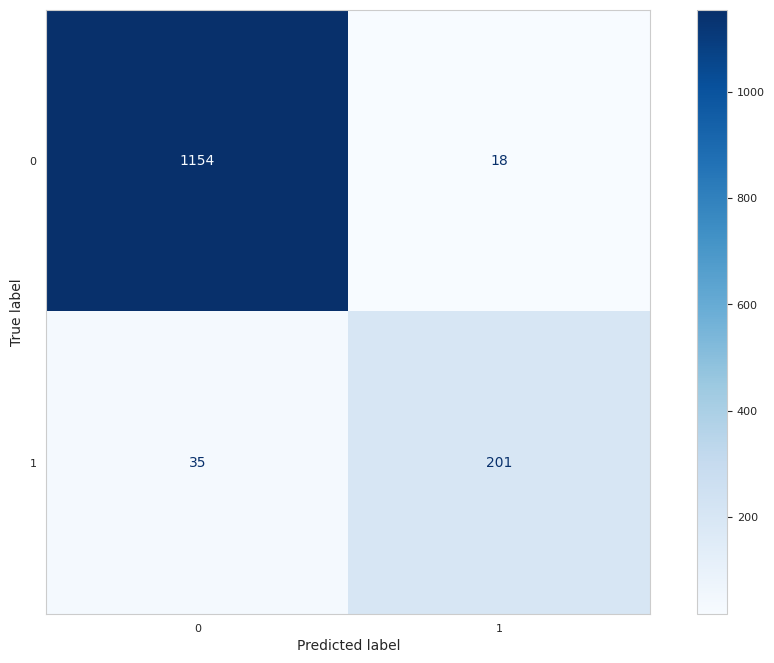

In [88]:
# create confusion matrics
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, cmap="Blues");

# **Save and Load the model**

In [97]:
# save the model
pickle.dump(xgb, open('xgboost_class_model.pkl', 'wb'))

In [98]:
# load the model
xgb_loaded = pickle.load(open('xgboost_class_model.pkl', 'rb'))

In [99]:
# run reloaded model
xgb_loaded.score(X_test_processed, y_test)

0.9623579545454546

# **Print the results of the loaded model**

In [103]:
# print results of loaded xgb model
train_pred = xgb_loaded.predict(X_train_processed)
test_pred = xgb_loaded.predict(X_test_processed)

print('training scores')
print(classification_report(y_train, train_pred))

print('testing scores')
print(classification_report(y_test, test_pred));

training scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3510
           1       1.00      0.98      0.99       712

    accuracy                           1.00      4222
   macro avg       1.00      0.99      0.99      4222
weighted avg       1.00      1.00      1.00      4222

testing scores
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1172
           1       0.92      0.85      0.88       236

    accuracy                           0.96      1408
   macro avg       0.94      0.92      0.93      1408
weighted avg       0.96      0.96      0.96      1408



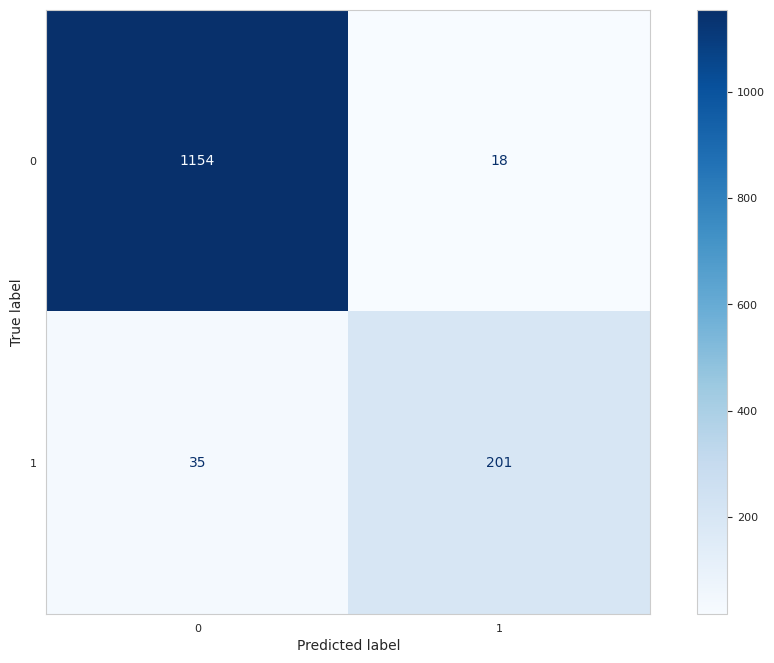

In [101]:
# create confusion matrics using loaded model
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, cmap="Blues");